### <center>Applied Machine Learning and Deep Learning (MS4S16) </center>
### <center>Practical Coursework 1</center>
### <center>Thayanantham Nitharshana(Student Number - 30119539)</center>

## 1. Pre-Processing and Exploratory Data Analysis (EDA)

**Pre-Processing:**
Data pre-processing involves cleaning and preparing the raw dataset for analysis. Common steps include handling missing values, encoding categorical variables, removing duplicates, and transforming data (e.g., normalization or scaling) where necessary. Outliers are detected and addressed, ensuring that the data is consistent and ready for modeling. 

**Exploratory Data Analysis (EDA):**
EDA is the initial phase of data analysis where various statistical techniques and visualization tools are used to understand the dataset’s structure and relationships between variables. This process involves identifying patterns, trends, and anomalies through descriptive statistics, correlation analysis, and visualizations such as histograms, box plots, scatter plots, and pair plots. EDA helps in understanding the distribution of data, detecting outliers, and forming hypotheses for further analysis.

### 1.1 Import Libraries and Load Dataset

Essential libraries are first imported for data manipulation (pandas), numerical operations (numpy), and visualizations (matplotlib, missingno, and seaborn). The dataset is then loaded, its structure is examined, and basic insights are obtained.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno
import scipy.cluster.hierarchy as sch
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, silhouette_score, davies_bouldin_score, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV,LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### 1.1.1 Load the dataset

The dataset is read using pd.read_csv(), and the first few rows are displayed using .head(). Additionally, info() is used to present basic information about the dataset.

In [451]:
# Load the dataset
file_path = "E:/USW/sem02/mechinelearning/MS4S16_Assessment_1_Dataset.csv"
df = pd.read_csv(file_path)

# Display few rows of the dataset
print(df.head())

                              Name                     SMILES   LD50  \
0                   4-nitroaniline    Nc1ccc([N+](=O)[O-])cc1  2.265   
1                    4-nitrophenol    O=[N+]([O-])c1ccc(O)cc1  2.838   
2  1-(chloromethyl)-4-nitrobenzene  O=[N+]([O-])c1ccc(CCl)cc1  1.977   
3         1-methoxy-4-nitrobenzene   COc1ccc([N+](=O)[O-])cc1  1.823   
4  benzene-1,4-dicarbonyl chloride   O=C(Cl)c1ccc(C(=O)Cl)cc1  1.910   

      BertzCT     Chi2v     Chi3n     Chi3v     Chi4n     Chi4v  \
0  242.429658  1.848642  1.103907  1.103907  0.596038  0.596038   
1  241.674771  1.773508  1.060528  1.060528  0.574349  0.574349   
2  257.648013  2.324449  1.301462  1.610069  0.706751  0.884925   
3  254.893126  1.955135  1.283242  1.283242  0.703937  0.703937   
4  283.334675  2.811331  1.338820  1.775256  0.732299  0.984275   

   HeavyAtomCount  ...  NumHAcceptors  NumHDonors  NumHeteroatoms  RingCount  \
0              10  ...              3           1               4          1   
1   

#### 1.1.2 Check dataset structure

df.info() is used to provide an overview of column names, data types, and the number of non-null values.

In [452]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7397 entries, 0 to 7396
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 7397 non-null   object 
 1   SMILES               7397 non-null   object 
 2   LD50                 7396 non-null   float64
 3   BertzCT              7392 non-null   float64
 4   Chi2v                7389 non-null   float64
 5   Chi3n                7389 non-null   float64
 6   Chi3v                7389 non-null   float64
 7   Chi4n                7393 non-null   float64
 8   Chi4v                7394 non-null   float64
 9   HeavyAtomCount       7397 non-null   int64  
 10  HeavyAtomMolWt       7396 non-null   float64
 11  Kappa3               7394 non-null   float64
 12  MaxPartialCharge     7392 non-null   float64
 13  MinAbsPartialCharge  7391 non-null   float64
 14  MinEStateIndex       7393 non-null   float64
 15  MinPartialCharge     7391 non-null   f

**Inspect data dimensions**

The DataFrame is simply summarised by the pandas df.info() method, which includes:

1. DataFrame Type: "<class 'pandas.core.frame.DataFrame'>" This indicates that df is a pandas DataFrame.
   
2. Index Information: "RangeIndex: 7397 entries, 0 to 7396" The dataset contains 7,397 rows, indexed from 0 to 7,396
   
3. Column Information: "Data columns (total 28 columns):" The dataset has 28 columns (features).
   
4. Column-wise Details: Each column's name, number of non-null values, and data type are displayed.
   
5. Missing Values: Some columns (e.g., LD50, BertzCT, Chi2v) have fewer than 7,397 non-null values, meaning they contain missing data.
   
6. Data Types:
   
   - object: Text data (Name, SMILES).
  
   - int64: Integer numerical values (NumHAcceptors, NumHDonors, NumHeteroatoms, RingCount and HeavyAtomCount).
  
   - float64: Floating-point numerical values (LD50, BertzCT, Chi2v, Chi3n, Chi3v, Chi4n, Chi4v, HeavyAtomMolWt, Kappa3, MaxPartialCharge, MinAbsPartialCharge, MinEStateIndex, MinPartialCharge, MolLogP, MolWt, SMR_VSA10, SlogP_VSA12, SlogP_VSA5, VSA_EState4, VSA_EState9 and qed).


#### 1.1.3 Understand unique values for categorical features

In the dataset, the categorical features appear to be:

- Name (Chemical compound name)
  
- SMILES (Simplified Molecular Input Line Entry System representation)

To understand the unique values in these categorical features, the following pandas commands can be used.

1. **Check Unique Values Count** - This tells us how many unique values exist in each column.

In [453]:
print(df["Name"].nunique())   # Number of unique compound names
print(df["SMILES"].nunique()) # Number of unique SMILES representations

7304
7342


- Name (7304 unique values) is less than SMILES (7342 unique values)

    - This suggests that some compounds share the same name but have different structures (different SMILES).
  
    - Example: "Aspirin" might refer to multiple variations of its molecular structure.
  
- SMILES (7342 unique values) is very close to total rows (7397), but not equal
  
    - This means some SMILES strings are repeated, indicating duplicate molecules in the dataset.
  
    - Some molecules may have been tested under different conditions but still represent the same compound.
  
- Comparing to total rows (7397)
  
    - Since Name and SMILES have fewer unique values than the total dataset, there are duplicate or missing values.

2. **View Sample Unique Values** -This helps us inspect a few unique examples.

In [454]:
print(df["Name"].unique()[:10])   # First 10 unique names
print(df["SMILES"].unique()[:10]) # First 10 unique SMILES strings

['4-nitroaniline' '4-nitrophenol' '1-(chloromethyl)-4-nitrobenzene'
 '1-methoxy-4-nitrobenzene' 'benzene-1,4-dicarbonyl chloride'
 '1-isocyanato-4-nitrobenzene' '1-ethoxy-4-nitrobenzene'
 '2-chloro-n,n-diethylethanamine' '2-(diethylamino)ethanol'
 '4-ethenylcyclohexene']
['Nc1ccc([N+](=O)[O-])cc1' 'O=[N+]([O-])c1ccc(O)cc1'
 'O=[N+]([O-])c1ccc(CCl)cc1' 'COc1ccc([N+](=O)[O-])cc1'
 'O=C(Cl)c1ccc(C(=O)Cl)cc1' 'O=C=Nc1ccc([N+](=O)[O-])cc1'
 'CCOc1ccc([N+](=O)[O-])cc1' 'CCN(CC)CCCl' 'CCN(CC)CCO' 'C=CC1CC=CCC1']


**Names & SMILES are Linked:**

- Each name corresponds to a SMILES representation.

- If names are missing, SMILES can be used to identify compounds.

3. **Check Frequency Distribution** - This helps us identify frequent values and potential duplicates.

In [455]:
print(df["Name"].value_counts().head(10))   # Top 10 most common names
print('') 
print(df["SMILES"].value_counts().head(10)) # Top 10 most common SMILES

Name
none                                                                                              35
1,2,3,4,5,6-hexachlorocyclohexane                                                                  5
n-ethyl-1-[3-(trifluoromethyl)phenyl]propan-2-amine                                                4
[2-(4,5-dimethyl-1,3-dioxolan-2-yl)phenyl] n-methylcarbamate                                       4
2-amino-n-(1,2-diphenylpropan-2-yl)acetamide                                                       3
(5-cyclohexyl-2,3-dihydro-1h-inden-1-yl)methanol                                                   3
6-chloro-5-cyclohexyl-2,3-dihydro-1h-indene-1-carboxylic acid                                      3
[cyano-(3-phenoxyphenyl)methyl] 3-(2,2-dichloroethenyl)-2,2-dimethylcyclopropane-1-carboxylate     3
(5s)-2-methyl-5-prop-1-en-2-ylcyclohex-2-en-1-one                                                  2
methyl (e)-3-dimethoxyphosphoryloxybut-2-enoate                                       

**From Name**

- "none" appears 35 times, meaning some compounds are missing names.

- Some compounds, like "1,2,3,4,5,6-hexachlorocyclohexane", appear 5 times.

- This suggests duplicate entries where the same chemical name appears multiple times.

**From SMILES**
- The most frequent SMILES representation appears 4 times.

- Some molecules share the same structure but might have different experimental conditions or names.

#### 1.1.4 Summaries for numerical features (Basic Statistic)

Statistical summaries of numerical columns are now generated. df.describe() is used to provide key statistics, including the mean, minimum, maximum, and quartiles for numerical features.

In [456]:
# Display summary statistics
df.describe()

LD50      BertzCT        Chi2v        Chi3n        Chi3v  \
count  7396.00000  7392.000000  7389.000000  7389.000000  7389.000000   
mean      2.55419   400.140968     4.908541     2.473274     3.366371   
std       0.95169   305.446876     2.950234     1.832664     2.459651   
min       0.29100     2.000000     0.000000     0.000000     0.000000   
25%       1.86700   169.256513     2.784621     1.308924     1.651111   
50%       2.37800   351.572890     4.318588     2.050387     2.809473   
75%       3.04400   552.137280     6.462885     3.171446     4.516022   
max       7.20700  4025.484341    26.092602    21.050990    23.784903   

             Chi4n        Chi4v  HeavyAtomCount  HeavyAtomMolWt       Kappa3  \
count  7393.000000  7394.000000     7397.000000     7396.000000  7394.000000   
mean      1.622177     2.282153       16.169258      232.049389     7.799745   
std       1.436304     2.052736        7.705312      109.232519   160.977491   
min       0.000000     0.000000        2.000000       26.018000   -27.040000   
25%       0.724270     0.944832       11.000000      152.108000     2.058290   
50%       1.259558     1.785409       15.000000      218.183500     3.275854   
75%       2.122591     3.046399       20.000000      292.240250     4.856951   
max      16.235218    31.500000       90.000000     1247.715000  9507.960000   

       ...  NumHAcceptors   NumHDonors  NumHeteroatoms    RingCount  \
count  ...    7397.000000  7397.000000     7397.000000  7397.000000   
mean   ...       3.299851     0.787076        4.743409     1.417331   
std    ...       2.286146     1.163119        2.917261     1.313732   
min    ...       0.000000     0.000000        0.000000     0.000000   
25%    ...       2.000000     0.000000        3.000000     0.000000   
50%    ...       3.000000     0.000000        4.000000     1.000000   
75%    ...       4.000000     1.000000        6.000000     2.000000   
max    ...      35.000000    21.000000       35.000000    21.000000   

         SMR_VSA10  SlogP_VSA12   SlogP_VSA5  VSA_EState4  VSA_EState9  \
count  7397.000000  7397.000000  7397.000000  7397.000000  7397.000000   
mean     18.276877     9.552595    20.621943     1.267097     0.333946   
std      17.292006    15.629996    21.516070     2.627986     1.930950   
min       0.000000     0.000000     0.000000   -15.221693   -19.025978   
25%       5.969305     0.000000     5.563451     0.000000     0.000000   
50%      12.310731     0.000000    13.847474     0.311944     0.000000   
75%      27.293868    12.217873    28.763083     1.883273     0.000000   
max     182.425200   139.211279   208.079042    29.904342    23.150432   

               qed  
count  7397.000000  
mean      0.567852  
std       0.173972  
min       0.032375  
25%       0.446898  
50%       0.564131  
75%       0.701040  
max       0.944994  

[8 rows x 26 columns]

### 1.2 Handle Missing Values, Duplicates Rows and Outliers

#### 1.2.1 Check Missing Values, Duplicates Rows

It is common for some values in the dataset to be missing. Upon identifying the presence of missing values, appropriate strategies are implemented. Now, missing values, duplicate rows, and dataset dimensions are checked.

In [457]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")

# Get dataset dimensions
print(f"\nDataset Shape: {df.shape}")



Missing Values:
 LD50                   1
BertzCT                5
Chi2v                  8
Chi3n                  8
Chi3v                  8
Chi4n                  4
Chi4v                  3
HeavyAtomMolWt         1
Kappa3                 3
MaxPartialCharge       5
MinAbsPartialCharge    6
MinEStateIndex         4
MinPartialCharge       6
MolLogP                5
MolWt                  5
dtype: int64

Number of Duplicate Rows: 8

Dataset Shape: (7397, 28)


- df.isnull().sum() identifies missing values per column (To determine the extent of missing data, the number of missing values in each column is counted).

- df.duplicated().sum() checks for duplicate entries (we have 8 duplicate rows).

- df.shape gives the number of rows and columns (dataset had 7397 rows and 28 colums).

#### 1.2.2 Visualization of missing values

A method for visualising the distribution of NaN values is provided by the Missingno package. Missingno is a Pandas-compatible Python package.

1. **Matrix :** This matrix allows us to easily identify the dataset's missingness pattern.

<Axes: >

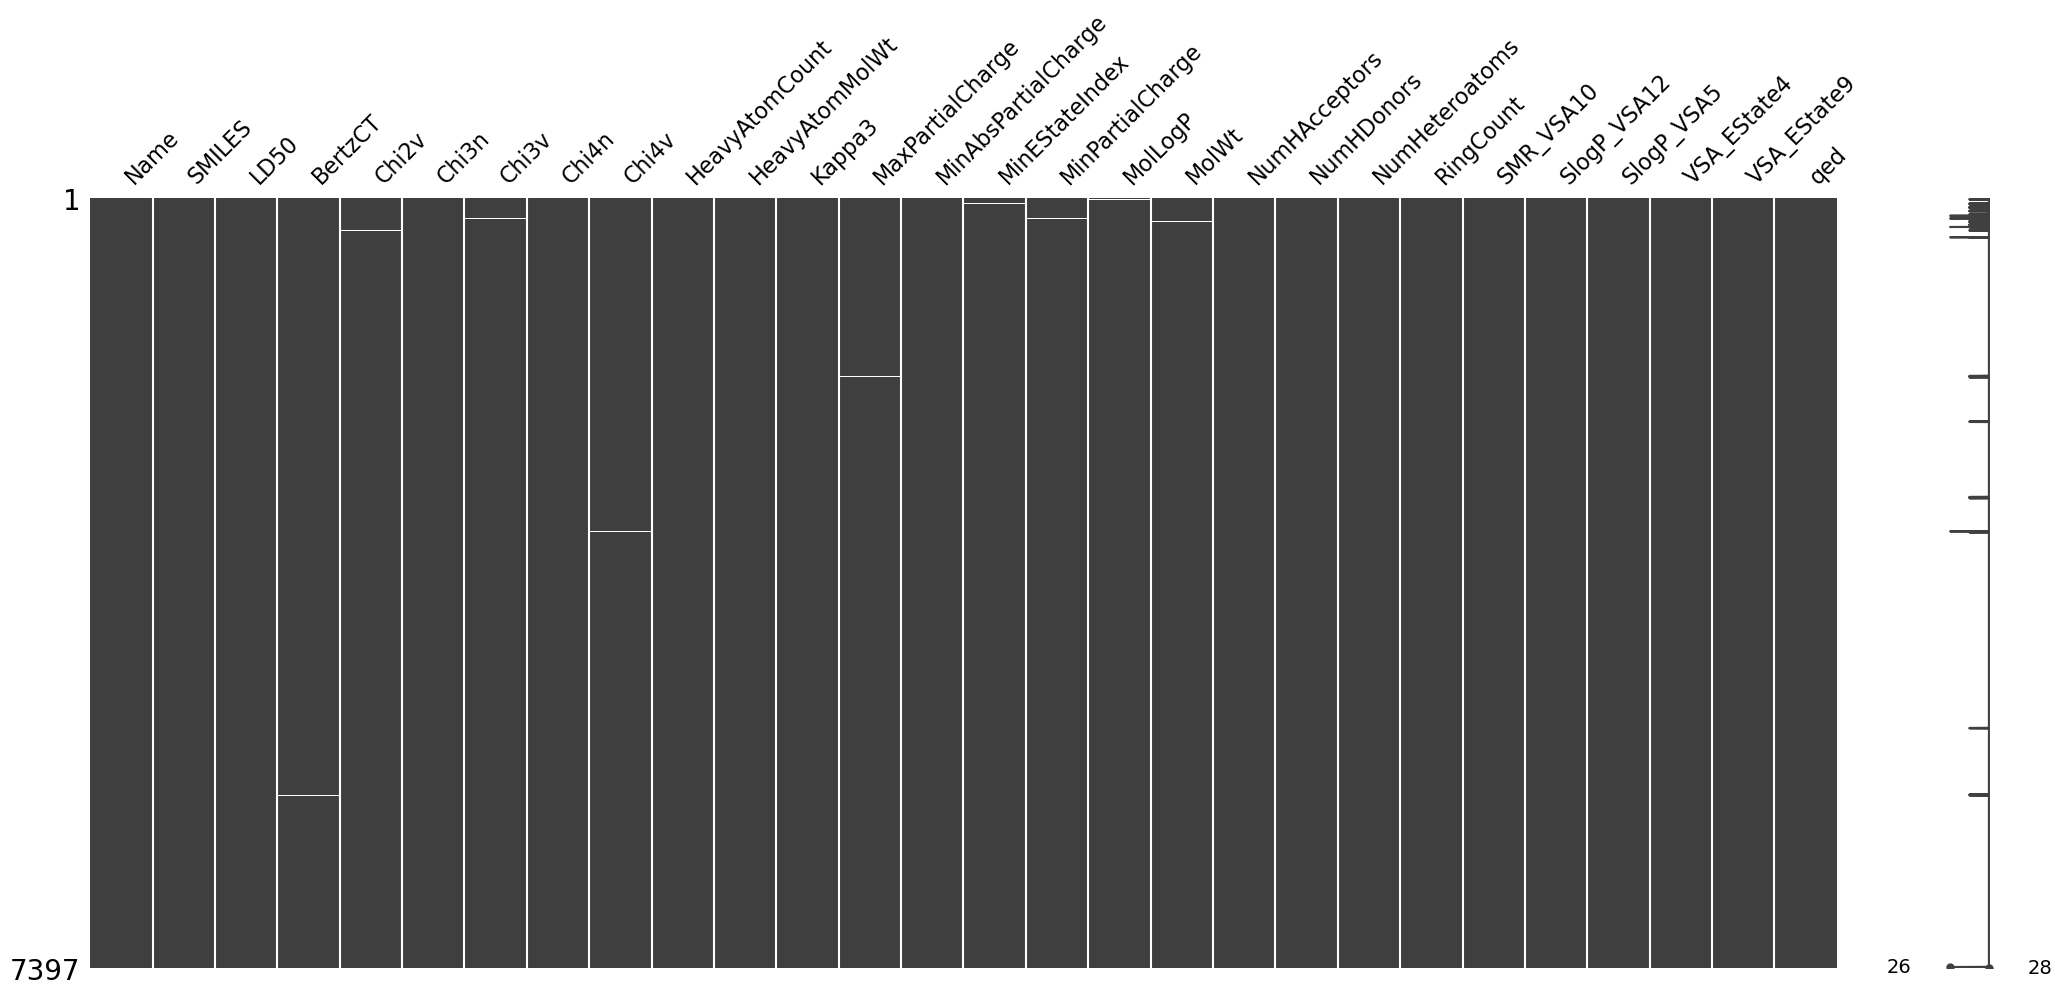

In [458]:
# Visualize missing values as a matrix 
msno.matrix(df)

2. **Bar Chart** - The number of missing values in each column is indicated by this bar chart. 

<Axes: >

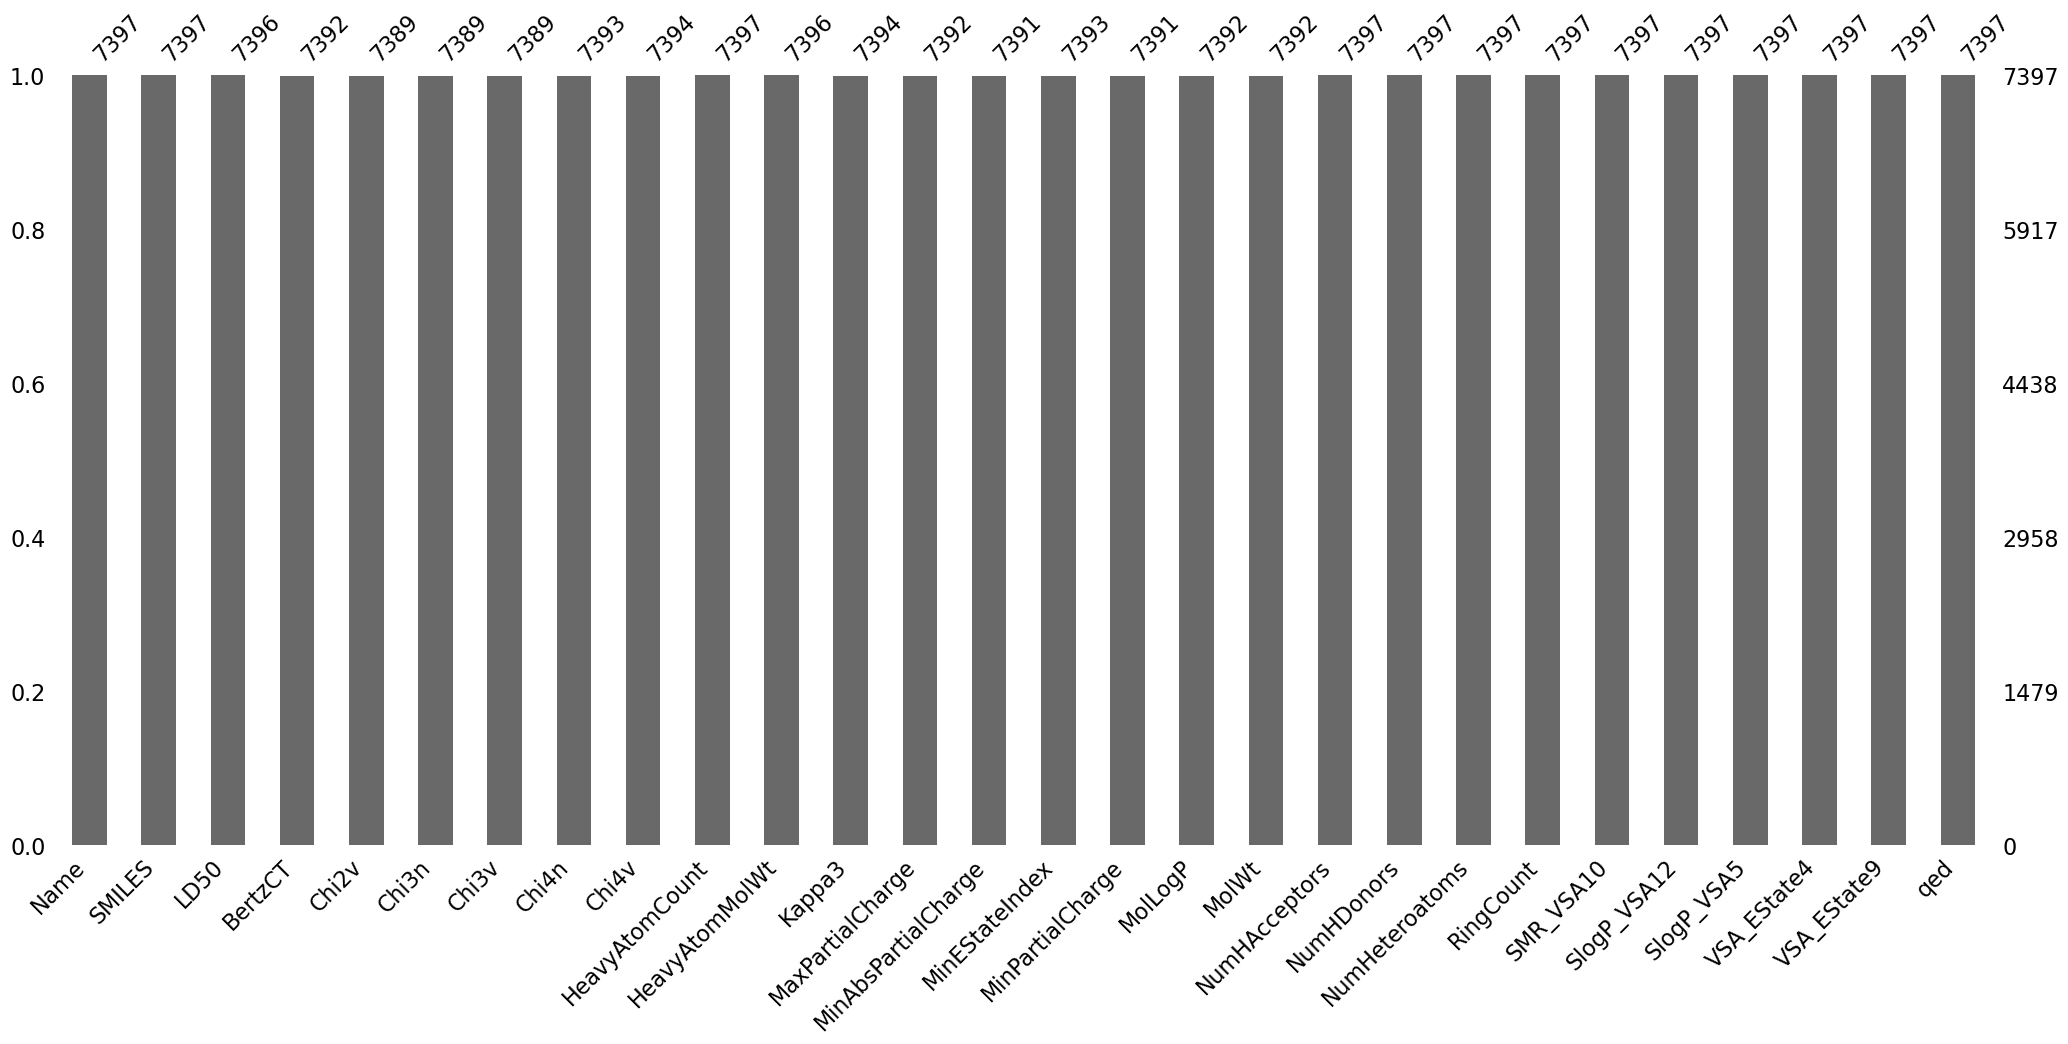

In [459]:
# Visualize the number of missing 
# values as a bar chart
msno.bar(df) 

3. **Heatmap :** - The heatmap shows correlations between missing values in different columns of your dataset.
   
- Color Scale (Blue to Red)
  
  - Blue (1.0): Indicates that missing values in one column are strongly correlated with missing values in another column.
  
  - White (0.0): Indicates no correlation in missingness.
  
  - Red (-1.0): Indicates a strong inverse correlation (if one column has missing values, the other does not).

- Annotations (e.g., 0.1, 0.2)

  - These numbers represent the correlation coefficient between missing values in two columns.
  
  - A value close to 1 means when one column has missing values, the other is likely to have missing values too.
  
  - A value close to 0 means missingness is independent.
  
  - A negative value (not seen here) would indicate that when one column has missing values, the other is more likely to be complete.

<Axes: >

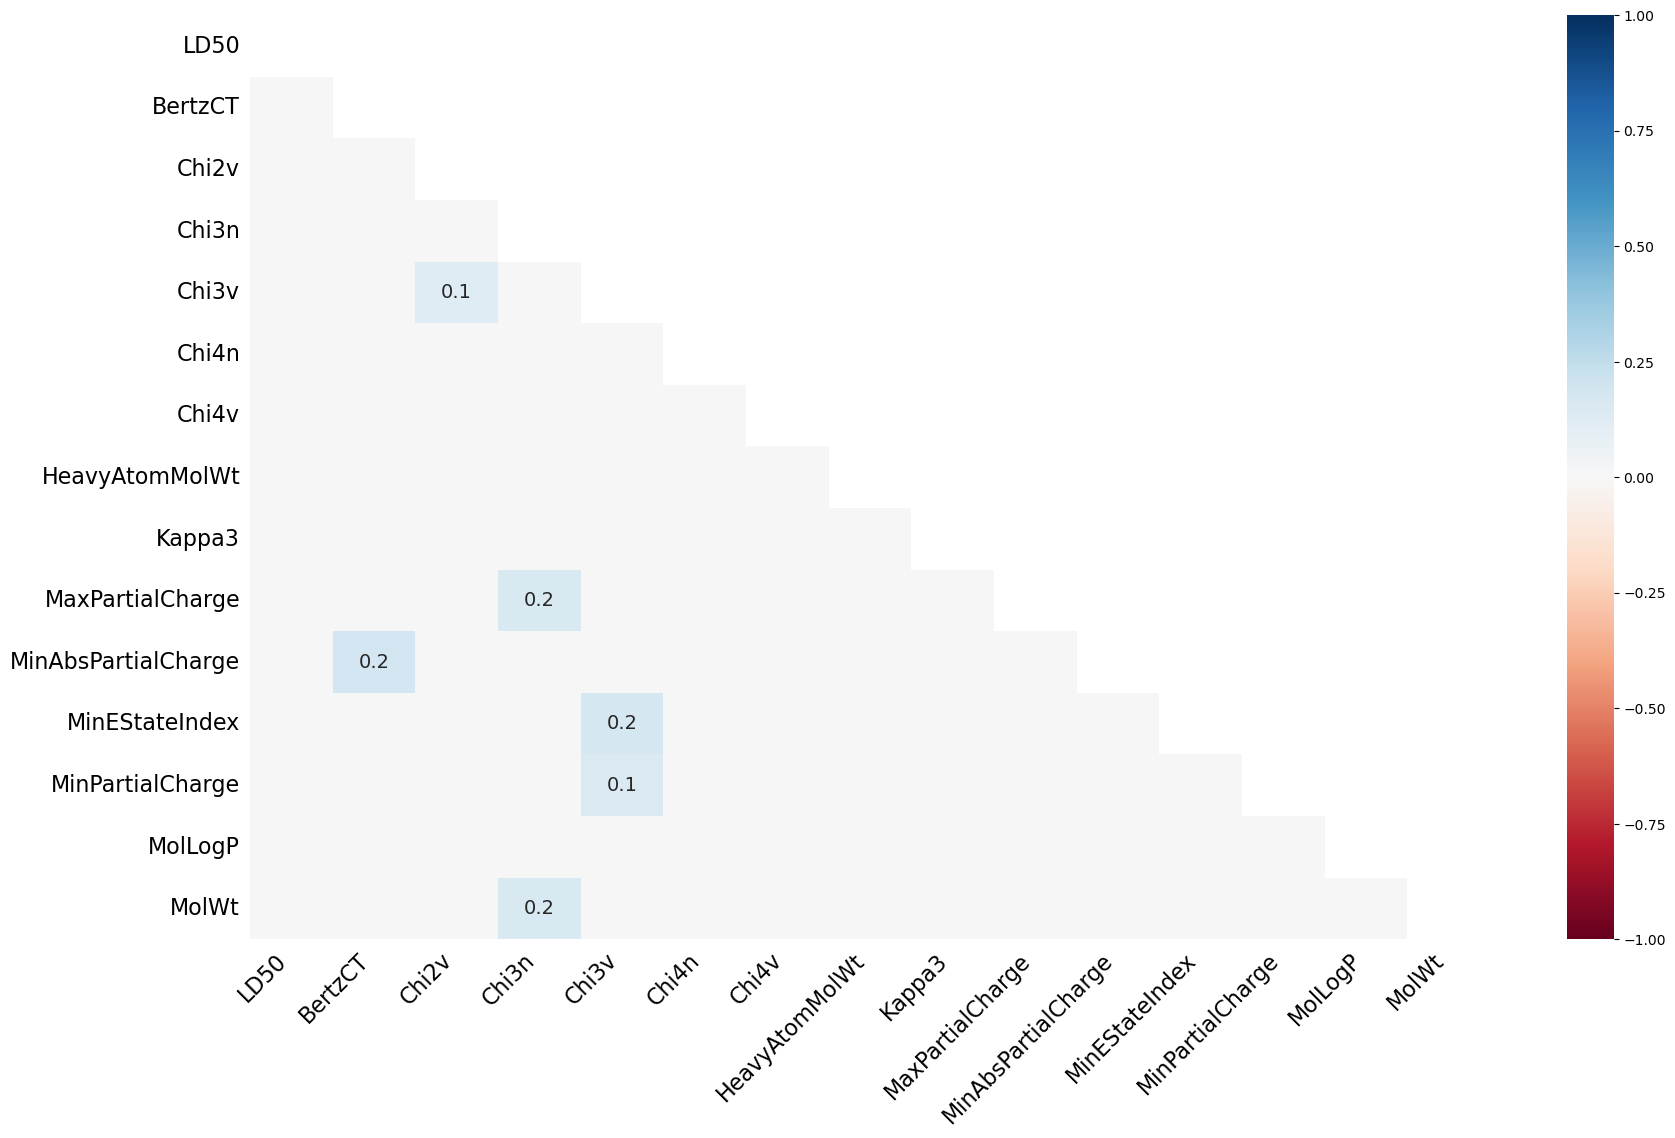

In [460]:
# Visualize the correlation between the number of 
# missing values in different columns as a heatmap 
msno.heatmap(df)

- Minimal Missing Data: Since most of the heatmap is white or very light blue, there is low correlation in missingness across columns, meaning missing values are scattered rather than clustered.
  
- Some Correlation (0.1 - 0.2): A few columns, such as Chi3n, MinAbsPartialCharge, MolWt, etc., have weak correlations (~0.1 - 0.2) with missing values in other columns. This suggests that when one of these columns has missing data, another might also be missing values.
  
- No Strong Dependence: Since no values are close to 1.0, missing values in one column do not strongly predict missing values in another column.

#### 1.2.3 Handling Missing Values

- If SMILES or Name are missing, we drop those rows since they are critical.

- Other numerical missing values are filled with the column mean.

In [461]:
# Check number of rows before and after dropping
initial_row_count = len(df)
df.dropna(subset=['SMILES', 'Name'], inplace=True)  # Drop rows with missing 'SMILES' or 'Name'
dropped_rows = initial_row_count - len(df)
print(f"Dropped {dropped_rows} rows with missing SMILES or Name")

# Replace empty strings and other non-numeric missing values with NaN
df.replace(["", " ", None], float('nan'), inplace=True)

# Check missing values before filling
missing_values_before = df.isnull().sum()

# Fill missing numerical values with the column mean
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col] = df[col].fillna(df[col].mean())

# Check missing values after filling
missing_values_after = df.isnull().sum()

# Print out the number of missing values before and after
print(f"Missing values before filling:\n{missing_values_before}")
print('') 
print(f"Missing values after filling:\n{missing_values_after}")


Dropped 0 rows with missing SMILES or Name
Missing values before filling:
Name                   0
SMILES                 0
LD50                   1
BertzCT                5
Chi2v                  8
Chi3n                  8
Chi3v                  8
Chi4n                  4
Chi4v                  3
HeavyAtomCount         0
HeavyAtomMolWt         1
Kappa3                 3
MaxPartialCharge       5
MinAbsPartialCharge    6
MinEStateIndex         4
MinPartialCharge       6
MolLogP                5
MolWt                  5
NumHAcceptors          0
NumHDonors             0
NumHeteroatoms         0
RingCount              0
SMR_VSA10              0
SlogP_VSA12            0
SlogP_VSA5             0
VSA_EState4            0
VSA_EState9            0
qed                    0
dtype: int64

Missing values after filling:
Name                   0
SMILES                 0
LD50                   0
BertzCT                0
Chi2v                  0
Chi3n                  0
Chi3v                  0
Chi4n  

#### 1.2.4 Remove Duplicate Rows

- df.duplicated().sum() counts duplicate rows.

- df.drop_duplicates() removes them

In [462]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicate rows
df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")

# Count duplicate after remove rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows after removing rows: {duplicate_count}")


Number of duplicate rows: 8
Dataset shape after removing duplicates: (7389, 28)
Number of duplicate rows after removing rows: 0


#### 1.2.5 Detect and Handle Outliers

The Interquartile Range (IQR) method is used to detect outliers.

**Handling Outliers of Target Variable (LD50)** 

The median lethal dose (LD50) value of the compound serves as the target variable in the supervised analysis. Since LD50 is the variable being predicted, it is treated as the dependent (Y) variable in the machine learning models.

Number of outliers in LD50: 220


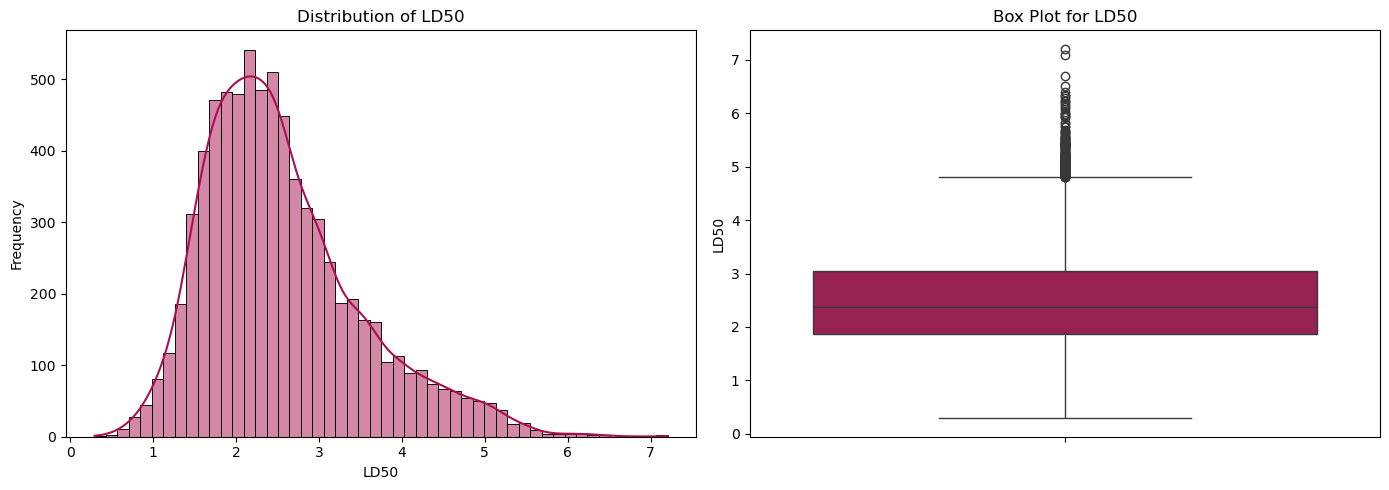

In [463]:
# Function to detect outliers using IQR for a given column
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers in the target variable LD50
outliers_ld50 = detect_outliers(df, 'LD50')

print(f"Number of outliers in LD50: {len(outliers_ld50)}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Histogram plot
sns.histplot(df["LD50"], bins=50, kde=True, color='#AA104F', ax=axes[0])
axes[0].set_title("Distribution of LD50")
axes[0].set_xlabel("LD50")
axes[0].set_ylabel("Frequency")

# Box plot
sns.boxplot(y=df["LD50"], color='#AA104F', ax=axes[1])
axes[1].set_title("Box Plot for LD50")

# Adjust layout
plt.tight_layout()
plt.show()


**Outliers of Other Numaric colums**

can use methods such as capping (winsorization) for handle outliers. which is Replace extreme values with the 25th and 75th percentile values.

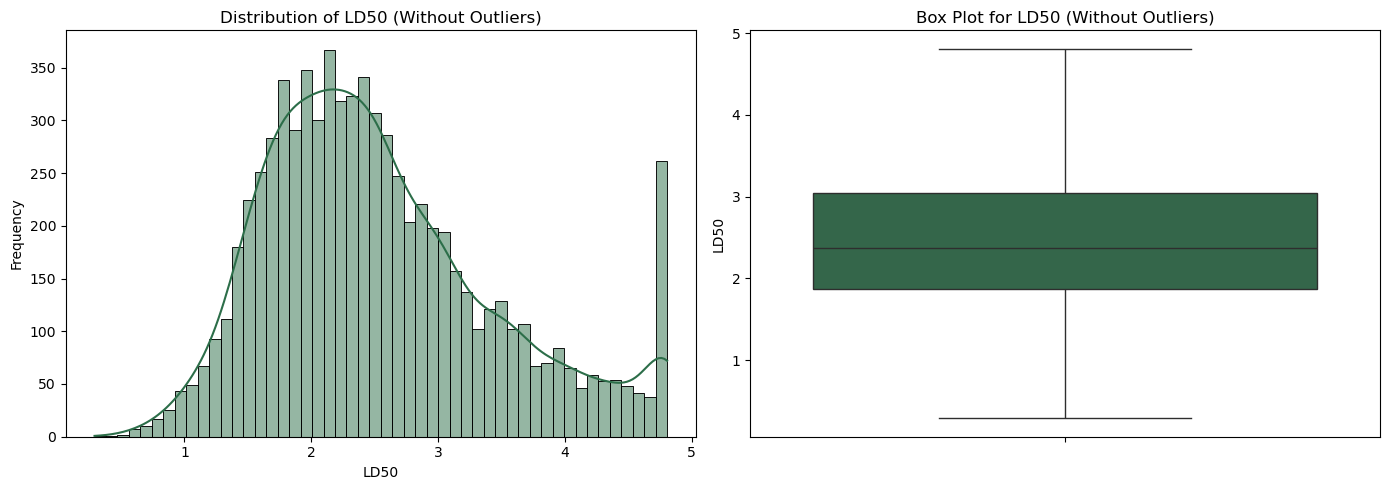

In [464]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply winsorization (capping)
for col in numerical_cols:
    Q1 = np.percentile(df[col], 25)  # 25th percentile
    Q3 = np.percentile(df[col], 75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Apply capping
    df[col] = np.clip(df[col], lower_bound, upper_bound)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Histogram plot
sns.histplot(df["LD50"], bins=50, kde=True, color='#2C6E49', ax=axes[0])
axes[0].set_title("Distribution of LD50 (Without Outliers)")
axes[0].set_xlabel("LD50")
axes[0].set_ylabel("Frequency")

# Box plot
sns.boxplot(y=df["LD50"], color='#2C6E49', ax=axes[1])
axes[1].set_title("Box Plot for LD50 (Without Outliers)")

# Adjust layout
plt.tight_layout()
plt.show()


By comparing the box plot before and after handling outliers, it can be observed that the outlier values have been removed, indicating that the outlier values were replaced using the IQR method.

### 1.3 Transform data

It is advisable to apply a transformation if the data exhibits high levels of skew, indicating non-normality. To determine the best transformation (Log, Root, or Box-Cox) for the LD50 dataset, the distribution of LD50 should first be checked.

#### 1.3.1 Check the Distribution of LD50

We plot a histogram and a Q-Q plot to see if LD50 is normally distributed.

  - If the histogram is right-skewed (long tail on the right), we need a transformation.
  
  - If the Q-Q plot deviates from the normal line, we should apply a transformation.

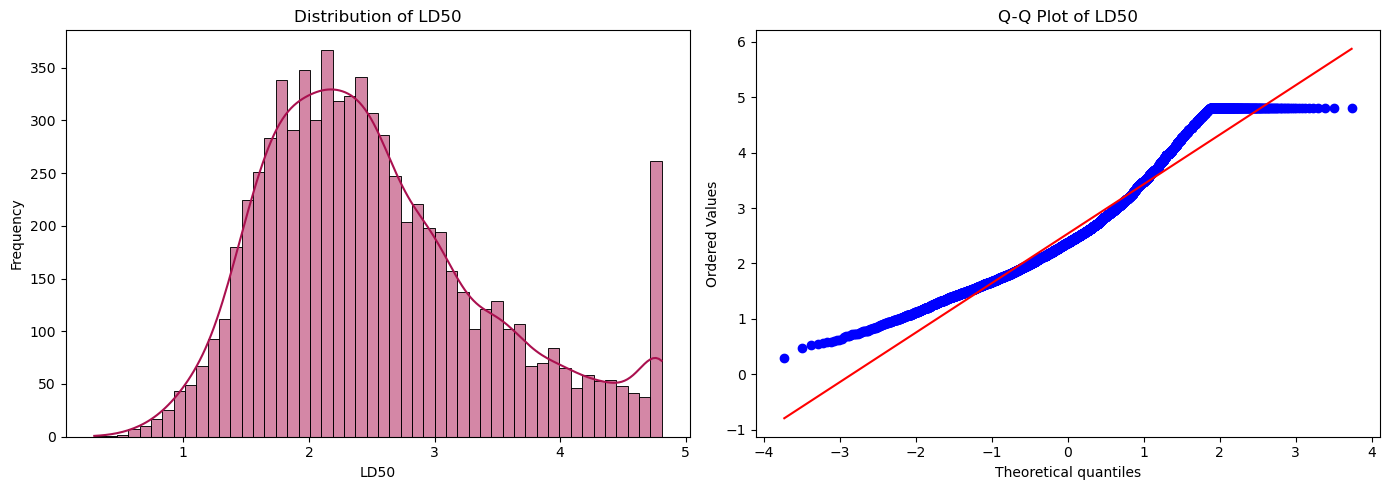

In [465]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Histogram plot
sns.histplot(df["LD50"], bins=50, kde=True, color='#AA104F', ax=axes[0])
axes[0].set_title("Distribution of LD50")
axes[0].set_xlabel("LD50")
axes[0].set_ylabel("Frequency")

# Q-Q Plot
stats.probplot(df["LD50"], dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot of LD50")

# Adjust layout
plt.tight_layout()
plt.show()


Based on the bar chart and Q-Q plot, it can be observed that the data is moderately right-skewed and follows an approximately normal distribution. However, to enhance accuracy, various transformation methods will be applied to compare their effectiveness in improving the normality of the distribution.

#### 1.3.2 Apply Different Transformations and Check Improvement

We apply Log, Root, and Box-Cox transformations and compare the results.

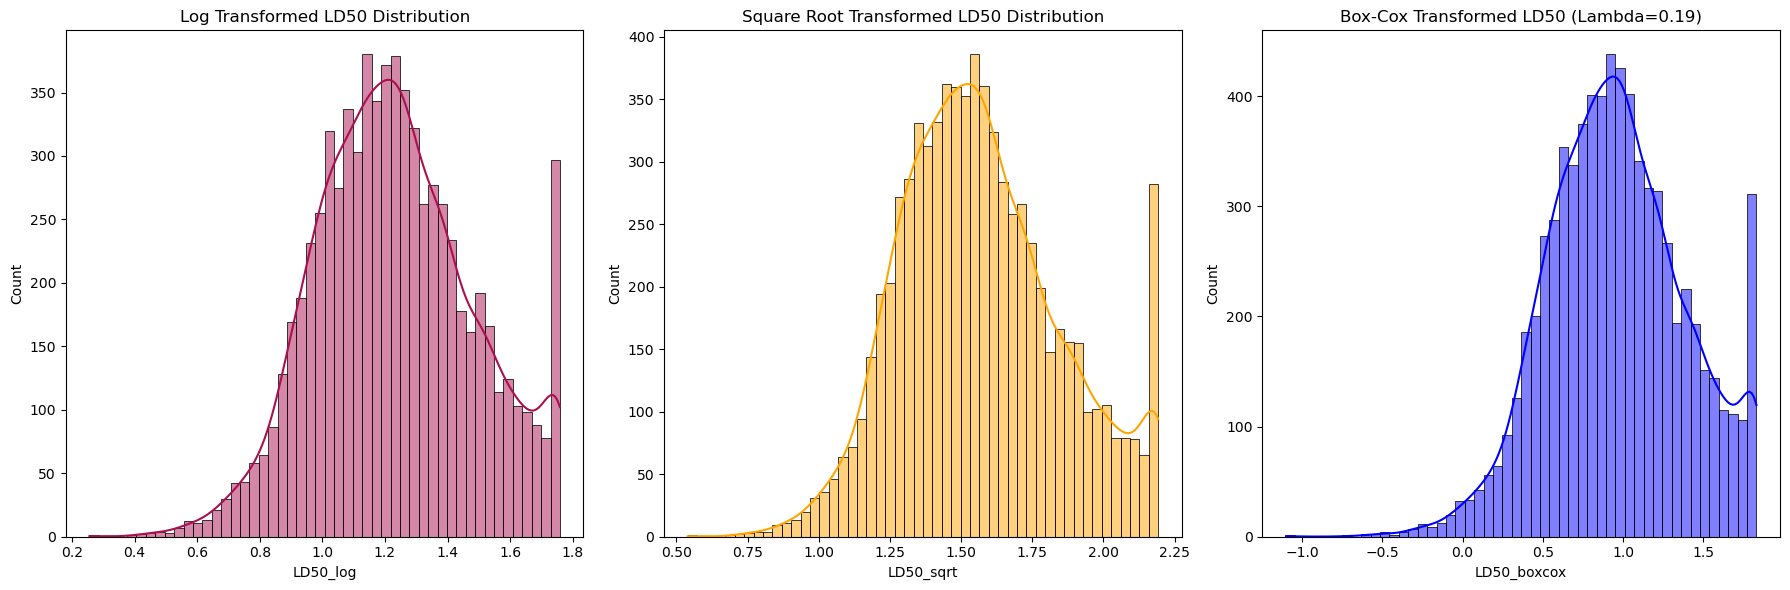

In [466]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Log Transformation
df["LD50_log"] = np.log1p(df["LD50"])
sns.histplot(df["LD50_log"], bins=50, kde=True, color='#AA104F', ax=axes[0])
axes[0].set_title("Log Transformed LD50 Distribution")

# Square Root Transformation
df["LD50_sqrt"] = np.sqrt(df["LD50"])
sns.histplot(df["LD50_sqrt"], bins=50, kde=True, color='orange', ax=axes[1])
axes[1].set_title("Square Root Transformed LD50 Distribution")

# Box-Cox Transformation
df["LD50_boxcox"], lambda_bc = stats.boxcox(df["LD50"] + 1e-5)
sns.histplot(df["LD50_boxcox"], bins=50, kde=True, color='blue', ax=axes[2])
axes[2].set_title(f"Box-Cox Transformed LD50 (Lambda={lambda_bc:.2f})")

plt.tight_layout()
plt.show()


#### 1.3.3 Choose the Best Transformation

Compare the skewness values:

- If the Box-Cox transformation has the lowest skewness (closest to 0), then Box-Cox is the best choice.
  
- If the Log transformation yields similar or better results than Box-Cox, then Log should be preferred.
  
- If the Square Root transformation is already close to 0, then it is the simplest choice.

In [467]:
print("Skewness before transformation:", df["LD50"].skew())
print("Skewness after log transform:", df["LD50_log"].skew())
print("Skewness after sqrt transform:", df["LD50_sqrt"].skew())
print("Skewness after Box-Cox transform:", df["LD50_boxcox"].skew())


Skewness before transformation: 0.7194247742225407
Skewness after log transform: 0.12550245568216098
Skewness after sqrt transform: 0.3005665259762461
Skewness after Box-Cox transform: -0.0012615128983200447


Here’s the analysis of our skewness values:

  - Before transformation: 0.719 (SLikely right-skewed (positive))
  
  - Log Transform: 0.125 (Reduces right skew significantly)
  
  - Square Root Transform: 0.300 (Moderate reduction in skewness)
  
  - Box-Cox Transform: -0.001 (Almost perfectly normal ideal skew ≈ 0)
  
**Best Choice is Box-Cox Transform**

The Box-Cox transformation results in skewness closest to 0 (-0.001), meaning the data is most normally distributed.
This makes Box-Cox the best transformation for our LD50 variable.

Box-Cox Lambda Value: 0.19078821889900136


Skewness before transformation: 0.7194247742225407
Skewness after Box-Cox transform: -0.001261470506241874


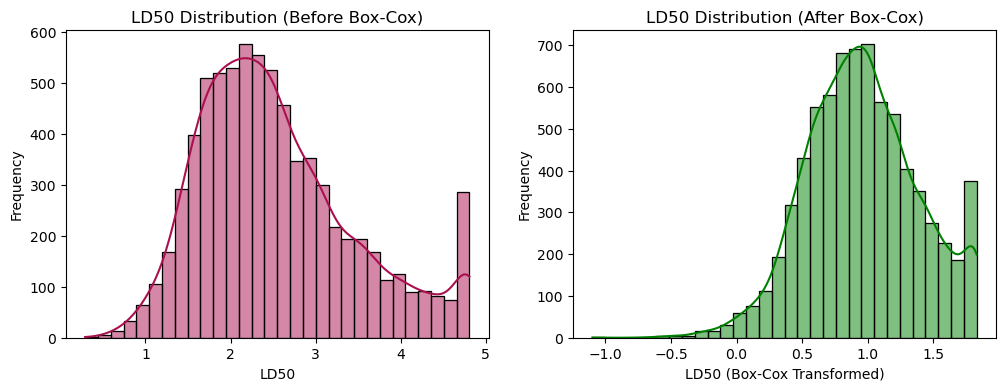

In [468]:
# Ensure LD50 is positive (Box-Cox requires positive values)
df = df[df["LD50"] > 0]  # Remove any non-positive values

# Apply Box-Cox transformation
df["LD50_boxcox"], lambda_value = stats.boxcox(df["LD50"])

# Print the lambda value (important for inverse transformation if needed)
print(f"Box-Cox Lambda Value: {lambda_value}")

# Check skewness after transformation
print("Skewness before transformation:", df["LD50"].skew())
print("Skewness after Box-Cox transform:", df["LD50_boxcox"].skew())

# Plot distributions before and after transformation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Before transformation
sns.histplot(df["LD50"], bins=30, kde=True, ax=ax[0], color="#AA104F")
ax[0].set_title("LD50 Distribution (Before Box-Cox)")
ax[0].set_xlabel("LD50")
ax[0].set_ylabel("Frequency")

# After transformation
sns.histplot(df["LD50_boxcox"], bins=30, kde=True, ax=ax[1], color="green")
ax[1].set_title("LD50 Distribution (After Box-Cox)")
ax[1].set_xlabel("LD50 (Box-Cox Transformed)")
ax[1].set_ylabel("Frequency")

plt.show()


The Box-Cox transformation applied to the data resulted in a lambda value of 0.1905. Before the transformation, the skewness was 0.7198, indicating a moderate right skew. After applying the Box-Cox transformation, the skewness improved to -0.0013, which is very close to 0, indicating a much more symmetric distribution. This suggests that the Box-Cox transformation effectively reduced the skewness and brought the distribution closer to normal.

### 1.4 Split Data into Training and Testing Sets

**Identify & Drop Constant Columns**

- Constant features have no variance, which can cause division by zero in StandardScaler.

- PCA relies on variance to identify the most important components. Constant columns add noise and should be removed first.

- It improves computational efficiency by reducing unnecessary columns.


In [469]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
if constant_cols:
    df = df.drop(columns=constant_cols)

Non-numeric columns (Name, SMILES) are dropped, and LD50 is kept as the target variable. The dataset is then split into training (80%) and test (20%) sets using train_test_split().

In [470]:
# Define features (X) and target variable (y)
X = df.drop(columns=['LD50', 'LD50_boxcox', 'Name', 'SMILES','LD50_log','LD50_sqrt'])  # Drop text columns
y = df['LD50_boxcox']  # Use Box-Cox transformed target

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (5911, 24)
Test set size: (1478, 24)


###  1.5 Feature Engineering

#### 1.5.1 Feature Encoding

So far, only numerical values have been considered. However, to enable the ML model to understand categorical variables, these variables need to be encoded into a numerical form. This encoding process allows them to be inputted into the ML model.

The dataset contains only numeric values (except for Name and SMILES), so no categorical encoding is required.

#### 1.5.2 Feature Selection

Feature importance will be checked using a correlation heatmap. A heatmap visually displays the correlations between features.

**1. Correlation Heatmap**

Shows relationships between numerical features. This is Important for:

- Feature Selection: Strongly correlated features might be redundant. You can remove one of the highly correlated variables to avoid multicollinearity in machine learning models.

- Model Interpretability: Features with strong correlations to LD50 (target variable) might be useful predictors.

- Data Relationships: Helps in understanding how different molecular properties influence toxicity.

In [471]:
# Select only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

#  Compute the correlation matrix
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

                         LD50   BertzCT     Chi2v     Chi3n     Chi3v  \
LD50                 1.000000  0.263826  0.370073  0.138754  0.393895   
BertzCT              0.263826  1.000000  0.610161  0.780933  0.602217   
Chi2v                0.370073  0.610161  1.000000  0.665930  0.955036   
Chi3n                0.138754  0.780933  0.665930  1.000000  0.683509   
Chi3v                0.393895  0.602217  0.955036  0.683509  1.000000   
Chi4n                0.134411  0.768361  0.643616  0.985536  0.667168   
Chi4v                0.377002  0.614357  0.925790  0.705570  0.971006   
HeavyAtomCount       0.245436  0.892086  0.751374  0.886798  0.723924   
HeavyAtomMolWt       0.353402  0.824531  0.827154  0.742189  0.797641   
Kappa3               0.014490  0.000714  0.372193  0.131178  0.257129   
MaxPartialCharge     0.271895  0.332701  0.261295  0.113974  0.233872   
MinAbsPartialCharge  0.230280  0.372382  0.254918  0.155088  0.230812   
MinEStateIndex      -0.344576 -0.271234 -0.442077 -

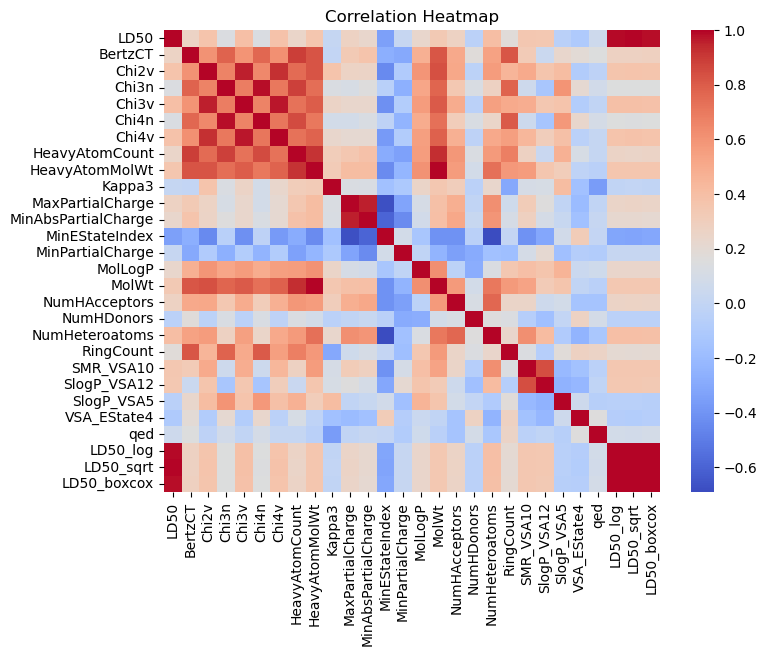

In [472]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap visualizes the relationships between the numerical features in the dataset:

- Diagonal Line (Dark Red - Always 1.0): Each variable is perfectly correlated with itself.

- Highly Correlated Features: Features like Chi3n, Chi3v, Chi4n, and Chi4v show very high positive correlations (>0.9) with each other, which could lead to multicollinearity issues. HeavyAtomCount and HeavyAtomMolWt are also strongly correlated, which is expected as heavier molecules tend to have more atoms. Additionally, MolLogP is positively correlated with RingCount, suggesting that molecules with more rings are likely to be more lipophilic.

- Missing Values: Some features, such as SMR_VSA10,SlogP_VSA12,SlogP_VSA5,SlogP_VSA5 have missing values (NaN).

- Negatively Correlated Features: MinEStateIndex shows a negative correlation with some molecular descriptors. LD50 has weak-to-moderate correlations with other features, indicating that multiple factors may influence toxicity.

- Weakly Correlated Features: Features like BertzCT, NumHDonors, and SMR_VSA10 show weak correlations with LD50, suggesting their limited impact on predicting toxicity.

This analysis highlights the relationships between features, their potential impact on multicollinearity, and their relevance in predicting the target variable, LD50.
  

Based on the correlation matrix analysis, the selected features are:

  - **Kappa3:** Highest absolute correlation with the target (-0.21), moderate negative correlation with RingCount (-0.576), but no severe multicollinearity with other features.
  
  - **RingCount:** Second-highest positive correlation with the target (0.207), low correlation with other features (-0.097 with MinPartialCharge).
  
  - **MinPartialCharge:** Moderate positive correlation with the target (0.172), moderate correlation with MinEStateIndex (0.45), acceptable for many models.
  
  - **MinEStateIndex:** Positive correlation with the target (0.165), complementary to MinPartialCharge.
  
  - **SlogP_VSA12:** Moderate negative correlation with the target (-0.156), low correlation with other features (except Kappa3: 0.31).
  
Excluded Feature
  
  - Highly correlated pairs (e.g., HeavyAtomCount/MolWt, Chi3n/Chi3v) where only one is retained.
    
  - Low correlation features (e.g., NumHAcceptors, NumHDonors) due to minimal relevance to the target.

#### 1.5.3 Scale Numeric Features

**Use Standardization (StandardScaler)**

StandardScaler() scales data to have zero mean and unit variance, crucial for clustering.

In [473]:
# Select only numeric columns
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), 
                              columns=X_train_numeric.columns, 
                              index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_numeric), 
                             columns=X_test_numeric.columns, 
                   
                             index=X_test.index)

**2. Random Forest model**

Mean Squared Error: 0.0756


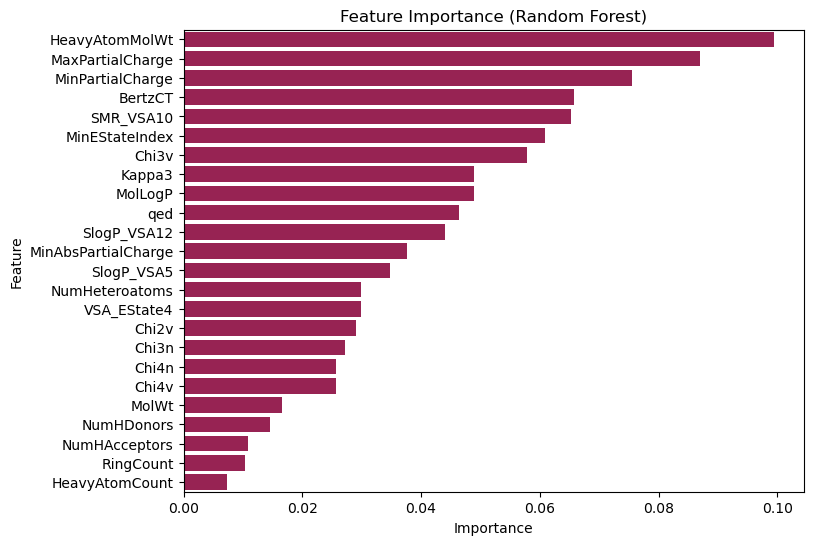

In [474]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Get feature importances
feature_importances = model.feature_importances_

# Visualize feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color="#AA104F")
plt.title("Feature Importance (Random Forest)")
plt.show()


**Key Observations**

- Mean Squared Error (MSE = 0.0756):
  
  - This indicates the model’s average prediction error. While the absolute value depends on the scale of your target variable (e.g., LD50), a lower MSE is generally better. Use this metric as a baseline for comparing future model iterations.

- Feature Importance Rankings:
  
  - Top Features:
  
    - MinPartialCharge (highest importance, ~0.10)
  
    - SlogP_VSA5, qed, BertzCT, MolLogP, MinEStateIndex
  
  - Least Important Features:
  
    - HeavyAtomCount, SlogP_VSA12, VSA_Estate9 (importance ~0.00)

- Domain Relevance:
  
  - MinPartialCharge and MinEStateIndex relate to molecular charge distribution and electrotopological states, which are critical for toxicity prediction (LD50).
  
  - BertzCT (molecular complexity) and MolLogP (hydrophobicity) are well-known descriptors in QSAR modeling.
  
  - SlogP_VSA5 combines logP and surface area, reflecting hydrophobic interactions.

**3. Lasso Regression model**

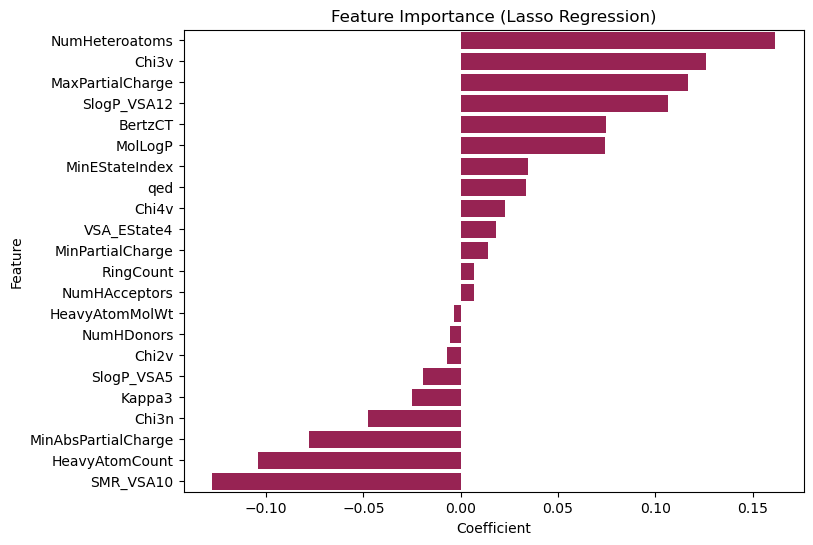

In [475]:
# Train a Lasso model
model = LassoCV(cv=5, max_iter=5000, random_state=42)
model.fit(X_train_scaled, y_train)

# Get the coefficients (importance) of each feature
lasso_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
lasso_importance = lasso_importance[lasso_importance['Coefficient'] != 0]
lasso_importance = lasso_importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=lasso_importance, color='#AA104F')
plt.title("Feature Importance (Lasso Regression)")
plt.show()

- Using Lasso regression is appropriate for feature selection, as it inherently penalizes less important features (shrinking their coefficients toward zero).

- The features retained by Lasso (e.g., MinEstateIndex, BertzCT, Kappa3, MolLogP) align with the correlation matrix analysis, suggesting consistency in identifying relevant features.


The selected features for LD50 prediction balance both linear and non-linear relationships. **BertzCT, MolLogP, MinEStateIndex, and Kappa3** are crucial in both models, capturing molecular complexity, hydrophobicity, and shape. Random Forest highlights **MinPartialCharge, SlogP_VSA5, and qed** for charge distribution and permeability, while Lasso identifies **NumHeteroatoms and HeavyAtomMolWt** for chemical reactivity. Low-importance and redundant features were excluded, ensuring a robust and interpretable model.

**Further explanation of feature importance analysis will be provided in the supervised machine learning section.**

### 1.6 EDA-Exploratory Data Analysis

EDA is a crucial step in machine learning that helps understand the dataset, identify patterns, detect anomalies, and make informed preprocessing decisions before model training.

#### 1.6.1 Data Distribution and Visualizations

This Helps identify skewness and normality of data distribution.

- Right-skewed (positively skewed): Apply log transformation.

- Left-skewed (negatively skewed): Use power transformation.

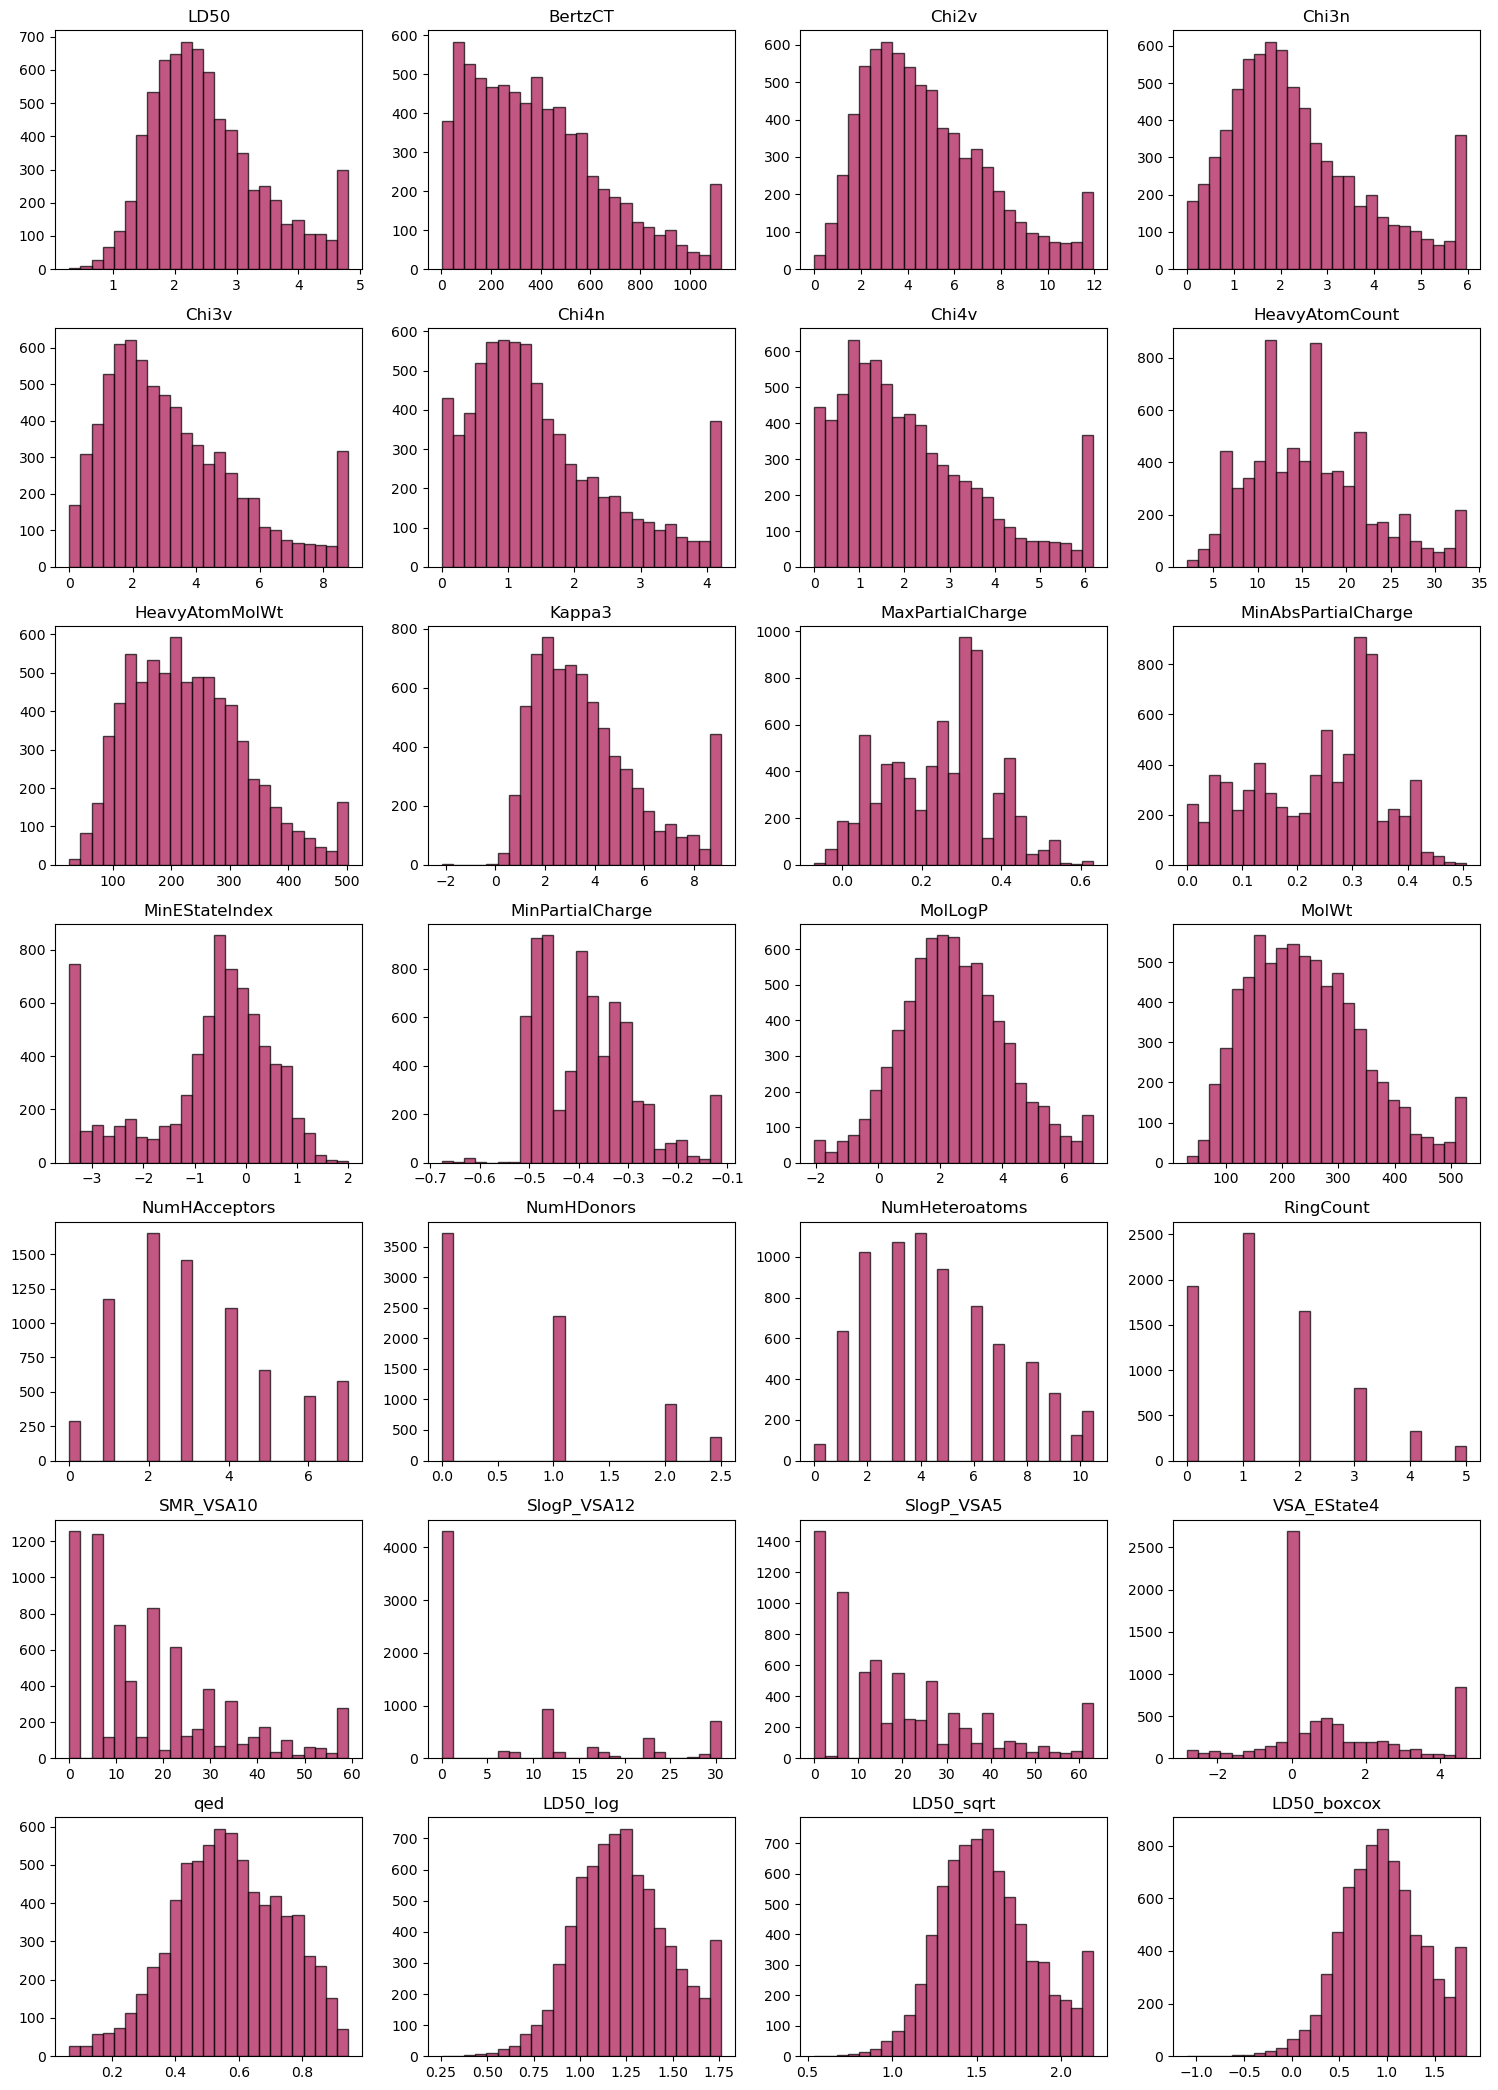

In [476]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Define number of rows and columns for subplots
num_cols = 4  # Adjust based on the number of features
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=25, edgecolor='black', alpha=0.7, color='#AA104F')
    axes[i].set_title(col)
    
# Hide unused subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


#### 1.6.2 Relationship Analysis 
**1. Pairplot of Selected Features**

Shows pairwise relationships between selected features. 

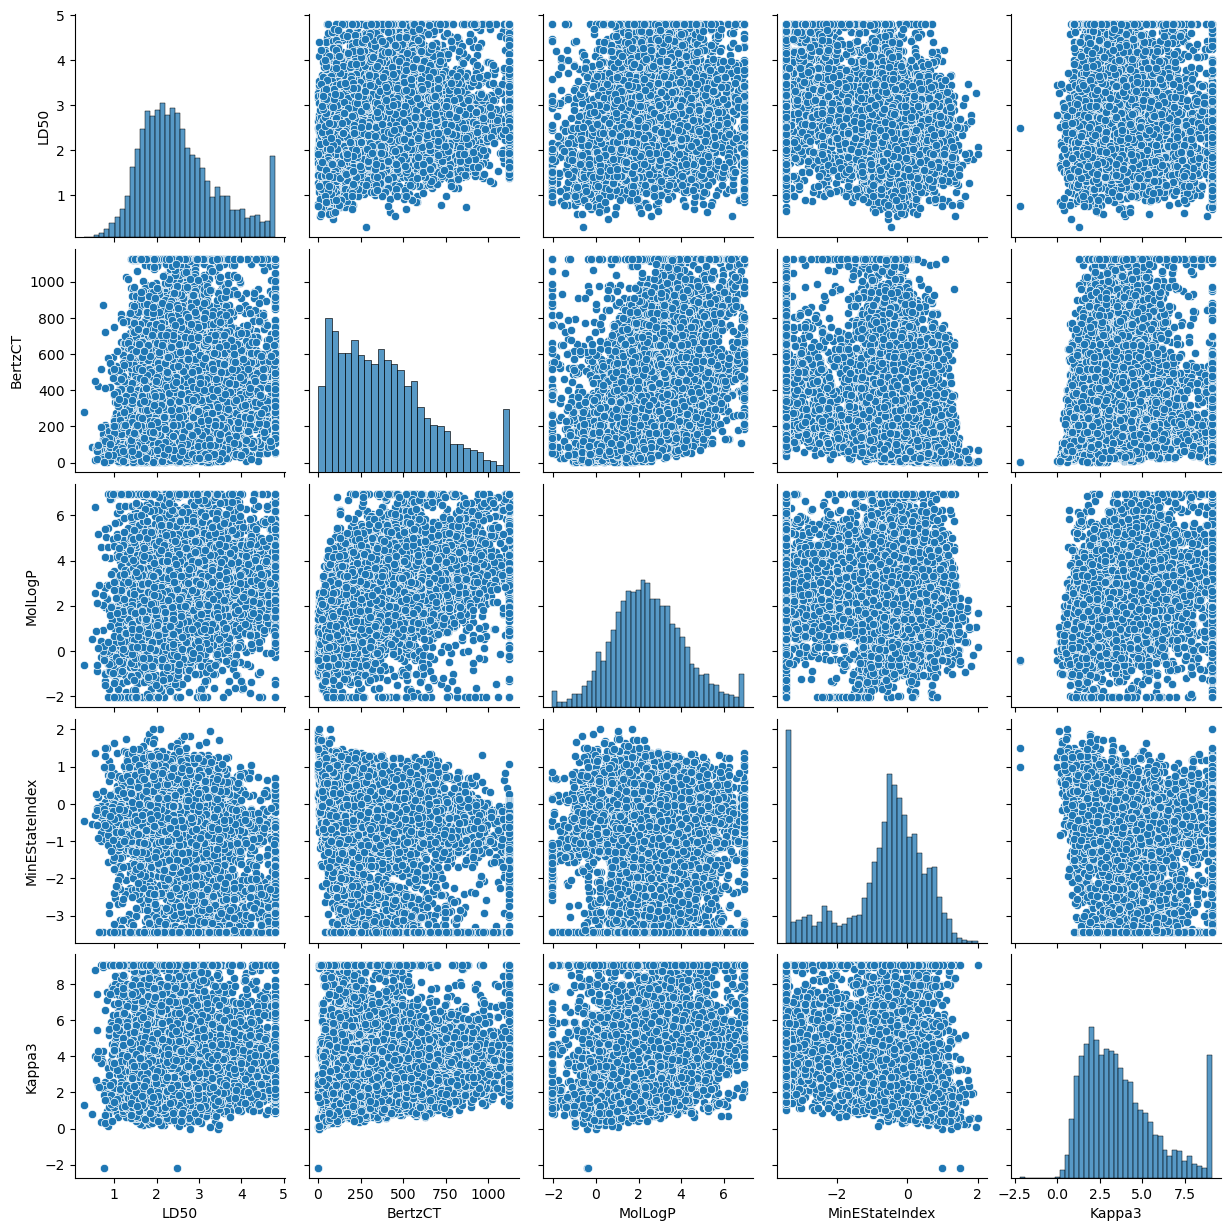

In [477]:
# Selecting a subset of features for visualization
selected_features = ['LD50', 'BertzCT', 'MolLogP', 'MinEStateIndex', 'Kappa3']

# Pairplot visualization
sns.pairplot(df[selected_features])  # Use a predefined palette
plt.show()


Key Observations from the Pair Plot

- Diagonal Elements → Histograms

  - The diagonal elements show the distribution of each feature (e.g., LD50, BertzCT, MolLogP, MinEStateIndex, Kappa3).
  
  - LD50 appears to have a slightly skewed distribution.
  
  - MolLogP and MinEStateIndex seem more normally distributed.

- Off-Diagonal Elements → Scatterplots

  - Each scatterplot shows the relationship between two variables.
  
  - BertzCT and MolLogP have a moderate positive correlation (values increase together).
  
  - LD50 does not show strong linear relationships with other features, indicating possible non-linear interactions.
  
  - Kappa3 and BertzCT have a more dispersed pattern, meaning they might not be strongly related.

**2. Scatter Plot: LD50 vs Molecular Weight**

Helps visualize trends between MolWt and LD50.

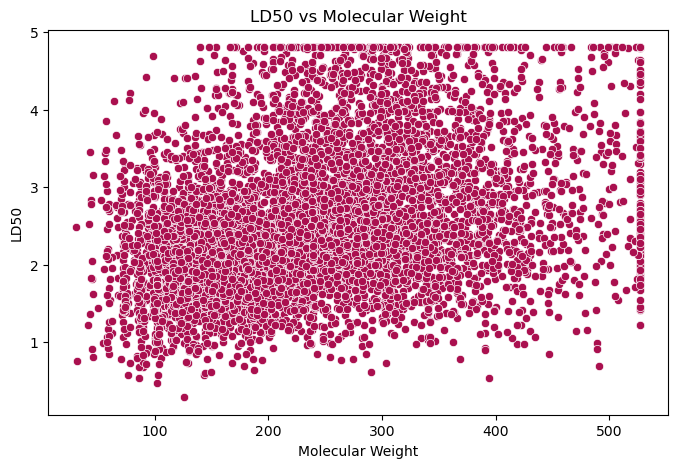

In [478]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['MolWt'], y=df['LD50'], color='#AA104F')
plt.xlabel("Molecular Weight")
plt.ylabel("LD50")
plt.title("LD50 vs Molecular Weight")
plt.show()


This is a scatter plot of LD50 vs. Molecular Weight, showing how the molecular weight of compounds relates to their toxicity (LD50 value).

1. Data Distribution: The points are spread widely across the plot, indicating high variability in LD50 values for different molecular weights. There is no clear linear pattern, meaning there may not be a strong correlation.

2. Possible Correlation: If the points formed a strong upward or downward trend, it would indicate a positive or negative correlation, respectively.Here, the spread suggests a weak or no clear relationship between molecular weight and LD50.

3. Density of Points: Many points are clustered between 100–150 Molecular Weight and 1.5–2.5 LD50, indicating that most compounds fall within this range. Some points are scattered outside this dense region, possibly representing outliers.

If LD50 does not strongly correlate with Molecular Weight, it may not be a key predictor. we might need non-linear models or feature engineering (e.g., interaction terms) to capture any hidden patterns.

### 1.7 Save Processed Data
The cleaned dataset is saved for further use.

In [479]:
# Save the cleaned and preprocessed dataset
df.to_csv("E:/USW/sem02/mechinelearning/cleaned_dataset.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


**Conclusion and Key Findings**

In the data preprocessing phase, several critical steps were successfully carried out to prepare the dataset for further analysis. First, missing values in the textual data were removed, as they could introduce noise into the model. For numerical data, missing values were imputed by replacing them with the mean of their respective columns. This imputation technique helps to preserve the dataset’s integrity without significantly affecting the distribution of the data.

Outliers were addressed using the Interquartile Range (IQR) method. Values falling outside the lower and upper bounds were capped, ensuring that extreme values would not distort the results of subsequent analyses. This method allows the dataset to maintain its statistical properties while reducing the impact of outliers.

Duplicate rows were removed to avoid redundancy in the dataset. This step ensures that each observation is unique, which is crucial for accurate modeling and avoids overfitting, especially in machine learning models.

Data transformations were applied to improve the model's performance. The Box-Cox transformation was used to stabilize variance and make the data more normally distributed. Standardization was also performed on the dataset to bring all the features to the same scale, making sure that no variable dominates due to its range.

Feature engineering was another important step in this process. New features were created to better represent underlying patterns in the data, while irrelevant or redundant features were removed to optimize the dataset for further analysis.

Key Findings:

- The dataset is now clean and ready for modeling, with missing values addressed, outliers handled, and duplicates removed.
  
- Data transformation has made the distribution more suitable for machine learning models that require normality and consistency in feature scales.
  
- Feature engineering has streamlined the dataset to include only the most relevant features for further analysis.
  
- Exploratory Data Analysis (EDA):This performed to understand the relationships between the features and target variable (LD50). Correlation analysis and data visualization techniques (scatter plots, heatmaps) used to identify potential multicollinearity issues and important feature interactions.

-------------------------------------------------------------------------------------------------------------

## 2. Unsupervised Machine Learning Analysis

This section presents an unsupervised machine learning analysis on the given dataset using clustering and dimensionality reduction techniques. The objective is to uncover hidden patterns in the dataset through various clustering algorithms and assess the effectiveness of dimensionality reduction.

#### 2.1 Dimensionality Reduction using PCA

This section presents an unsupervised machine learning analysis on the given dataset using clustering and dimensionality reduction techniques. The objective is to uncover hidden patterns in the dataset through the application of various clustering algorithms and the assessment of the effectiveness of dimensionality reduction.

In [480]:
# Apply PCA on training data
pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit on training set

# Transform test data using the same PCA model
X_test_pca = pca.transform(X_test_scaled)

# Convert to DataFrame for easier handling
df_train_pca = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'], index=X_train.index)
df_test_pca = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'], index=X_test.index)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.41663096 0.1509512 ]


The sum of the explained variance ratios of all components equals 1 (or 100%). In this output (Explained Variance: [0.41663096 0.1509512])

  - PC1 (First Principal Component) explains 41.66% of the total variance.
  
  - PC2 (Second Principal Component) explains 15.09% of the total variance.
  
  - Together, PC1 + PC2 account for 56.75% of the total variance in the dataset.

If the first two PCs capture most of the variance (>80%), PCA is effective in reducing dimensions without losing much information. If the total explained variance is too low (<60%), it may indicate that more components are needed.

In this data output 54% is not enough for meaningful analysis, consider adding more principal components. I used Use cumulative variance & scree plots to decide the optimal number of PCs.


[0.41663096 0.56758216]


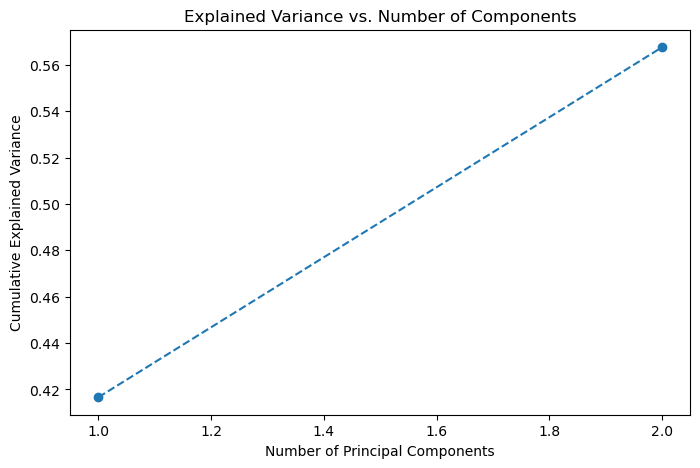

In [481]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

PC1 & PC2 together explain only 54.42% of variance, which might not be enough.

Scree Plot you generated shows the cumulative explained variance as a function of the number of principal components (PCs). Shows the percentage of the dataset’s variability that is retained.

- At PC1 → ~41% of variance is captured.

- At PC2 → ~56% of variance is captured.

The increase is linear, meaning PC2 still contributes useful variance, but it’s not enough to reach a high total variance.
If we want a good dimensionality reduction, I need more than 2 components to retain at least 70-80% of the variance.

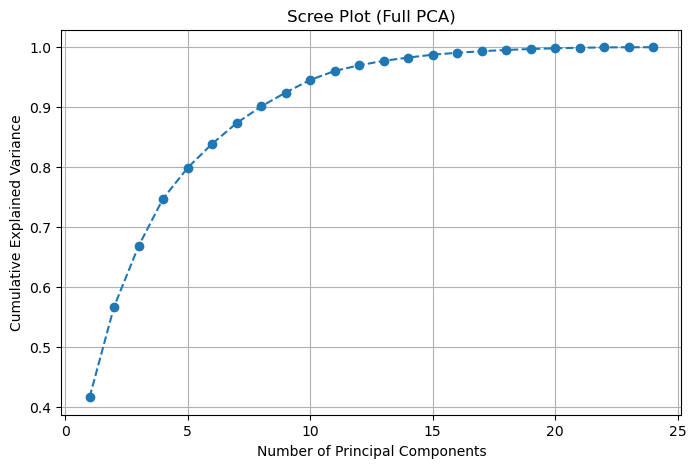

In [482]:
pca_full = PCA(n_components=None)
X_train_pca_full = pca_full.fit_transform(X_train_scaled)

# Plot cumulative explained variance
cumulative_variance_full = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance_full)+1), cumulative_variance_full, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot (Full PCA)')
plt.grid()
plt.show()


Scree plot shows the cumulative explained variance across principal components.

- The curve rises sharply initially → The first few principal components explain most of the variance.
  
- It starts to flatten around 10-15 components → Additional components contribute less variance.

- After ~15 components, the curve is almost flat → More components add little value.

- The elbow point appears around 10-15 components.

- This means selecting ~10 to 15 components should retain most of the variance while reducing dimensionality.

**Apply PCA with the Optimal Number of Components**

For minimal loss of information, I Choose 4 components, as it retains about 71.6% of the variance and is still a reasonable dimensionality reduction.

In [483]:
# Apply PCA on training data with 4 components
pca = PCA(n_components=4)  
X_train_pca = pca.fit_transform(X_train_scaled)  # Fit on training set

# Transform test data using the same PCA model
X_test_pca = pca.transform(X_test_scaled)

# Convert to DataFrame for easier handling
df_train_pca = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(4)], index=X_train.index)
df_test_pca = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(4)], index=X_test.index)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance: {explained_variance}")

Explained Variance: [0.41663096 0.1509512  0.10111318 0.07901379]


The total variance explained by the first four principal components is 74.76%, with PC1 (41.66%), PC2 (15.09%), PC3 (10.11%), and PC4 (7.90%) contributing to this value. This provides a good balance between dimensionality reduction and information retention, as 74.76% of the variance is captured, while keeping the model relatively simple. Compared to using only two components, more variance is retained. However, it is important to note that 28.40% of the variance is still lost. Depending on the complexity of the task, this trade-off may be acceptable.

### 2.2 Clustering Analysis

We’ll use K-Means, Hierarchical Clustering, and DBScan.

#### 2.2.1 Finding Optimal Clusters 

**1. Using the Elbow Method**

The elbow point helps choose an optimal K for K-Means.

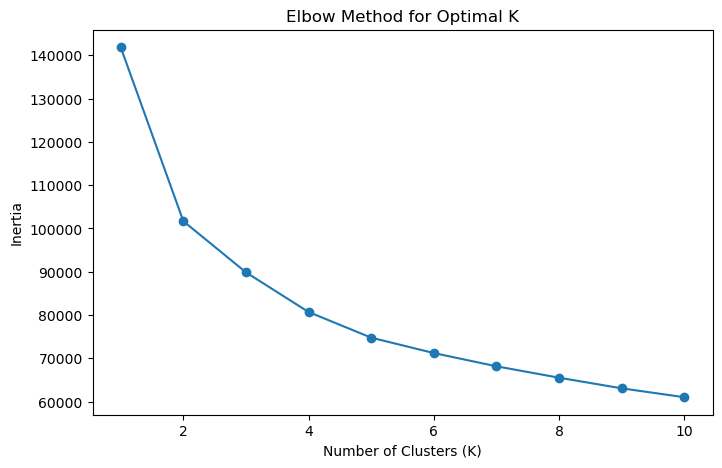

In [484]:
# Finding the optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


The K value in the Elbow Method is typically chosen at the point where the "elbow" (a bend) occurs in the plot of Within-Cluster Sum of Squares (WCSS) vs. Number of Clusters (K). 

Since the image only mentions "Number of Clusters (K)" without showing the actual curve or data points, the optimal K cannot be determined from the provided information. A sharp drop in this image from K=1 to K=2, then a much smaller drop from K=2 to K=3, the "elbow" likely occurs at K=2. A sharp drop continuing until K=3 followed by a plateau. I used aditional method to confirm K value is 2.

**2. using Silhouette Scores**

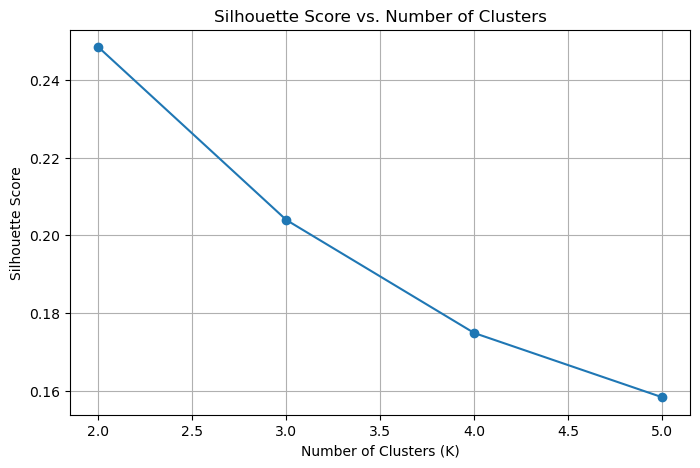

Optimal K: 2


In [485]:
# Calculate Silhouette Scores for different K values
silhouette_scores = []
k_values = range(2, 6)  # Test K=2 to K=5

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_scaled)
    silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

# Optimal K is where the score is highest
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal K: {optimal_k}")

The highest Silhouette Score (0.24) occurs at K=2, making it the optimal number of clusters.Lower scores for K=3, 4, and 5 indicate that adding more clusters reduces clustering quality.

Use K=2 for clustering, as it maximizes the Silhouette Score in this dataset.

#### 2.2.2 K-Means Clustering

In [486]:
# Apply K-Means with chosen K (e.g., 2)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)
df_train_pca['Cluster'] = kmeans.fit_predict(df_train_pca[['PC1', 'PC2']])

silhouette_kmeans = silhouette_score(df_train_pca, kmeans.labels_)
print(f"Silhouette Score (K-Means): {silhouette_kmeans}")

Silhouette Score (K-Means): 0.33686990358959507


The visualization still uses only the first two principal components (PC1 and PC2) because it’s common to visualize clustering results in 2D. 

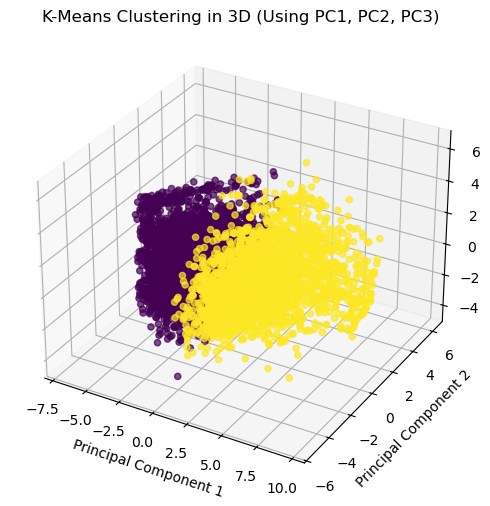

In [487]:
# 3D Scatter plot to visualize clusters
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_train_pca['PC1'], df_train_pca['PC2'], df_train_pca['PC3'], c=df_train_pca['Cluster'], cmap='viridis', alpha=0.7)
ax.set_title('K-Means Clustering in 3D (Using PC1, PC2, PC3)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

This extends the analysis to 3D by including PC3, which captures additional variance not explained by PC1 and PC2.

 - K=2 was optimal, separating the dataset into two groups with distinct characteristics.
  
 - PCA reduced dimensionality while preserving meaningful variance for visualization.

#### 2.2.3 Hierarchical Clustering (Dendrogram)

Dendrogram shows how clusters merge at different distances.

In [488]:
hierarchical = AgglomerativeClustering(n_clusters=2)
df_train_pca["Hierarchical_Cluster"] = hierarchical.fit_predict(X_train_scaled)

# Evaluate Hierarchical Clustering
silhouette_hierarchical = silhouette_score(X_train_scaled,df_train_pca["Hierarchical_Cluster"])

print(f"Silhouette Score (hierarchical): {silhouette_hierarchical:.4f}")

Silhouette Score (hierarchical): 0.2130


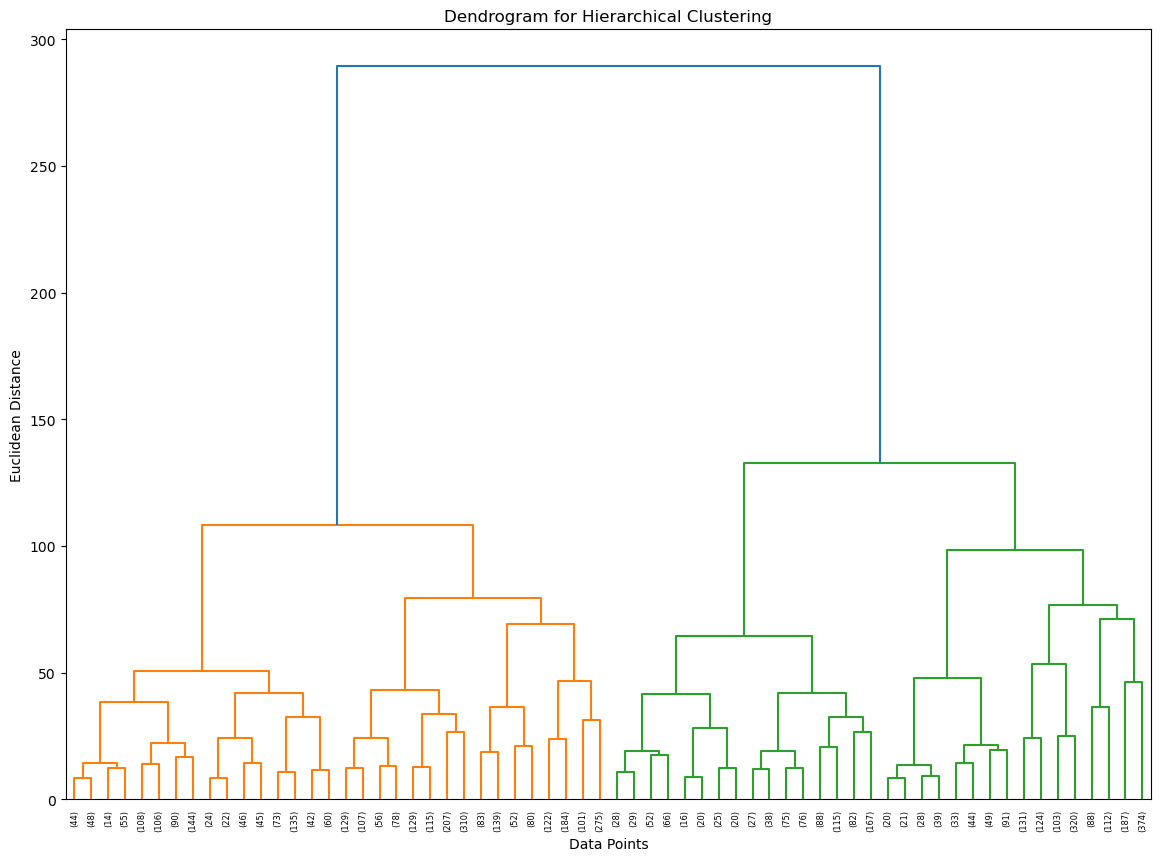

In [489]:
# Plot Dendrogram
plt.figure(figsize=(14, 10))
Z = linkage(df_train_pca, method='ward')
dendrogram(Z, truncate_mode="level", p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

This dendrogram illustrates hierarchical clustering, showing how data points merge based on similarity. The x-axis represents data points, while the y-axis indicates Euclidean distance. The two dominant branches suggest two major clusters. Higher merges reflect greater dissimilarity, and color highlights distinct groups. This visualization helps determine the optimal number of clusters, aiding in pattern identification and model refinement. Further evaluation using cut-off methods or silhouette scores can enhance clustering accuracy.

#### 2.2.4 DBScan Clustering

Density-Based Clustering (DBScan) finds non-spherical clusters. It’s robust to noise but requires setting eps and min_samples correctly.

In [490]:
# Apply DBSCAN clustering on PCA-reduced data (using all 4 components)
dbscan = DBSCAN(eps=1.5, min_samples=5)
df_train_pca['Cluster_DBScan'] = dbscan.fit_predict(df_train_pca[['PC1', 'PC2', 'PC3', 'PC4']])

if len(set(dbscan.labels_)) > 1:
    silhouette_dbscan = silhouette_score(X_train_scaled, dbscan.labels_)
    print(f"Silhouette Score (DBScan): {silhouette_dbscan}")

Silhouette Score (DBScan): 0.06161362634122942


Over-segmentation is suggested by the DBSCAN results, most likely as a result of less-than-ideal parameter values. This restricts how the 499 clusters can be interpreted.

#### 2.2.5 Evaluating Clustering Models

Silhouette Score for Clustering Quality. Silhouette Score measures clustering quality:
- Closer to 1 → better clusters.
- Closer to 0 → overlapping clusters.


Silhouette Score (K-Means): 0.33686990358959507
Silhouette Score (hierarchical): 0.21304711164798298
Silhouette Score (DBScan): 0.06161362634122942


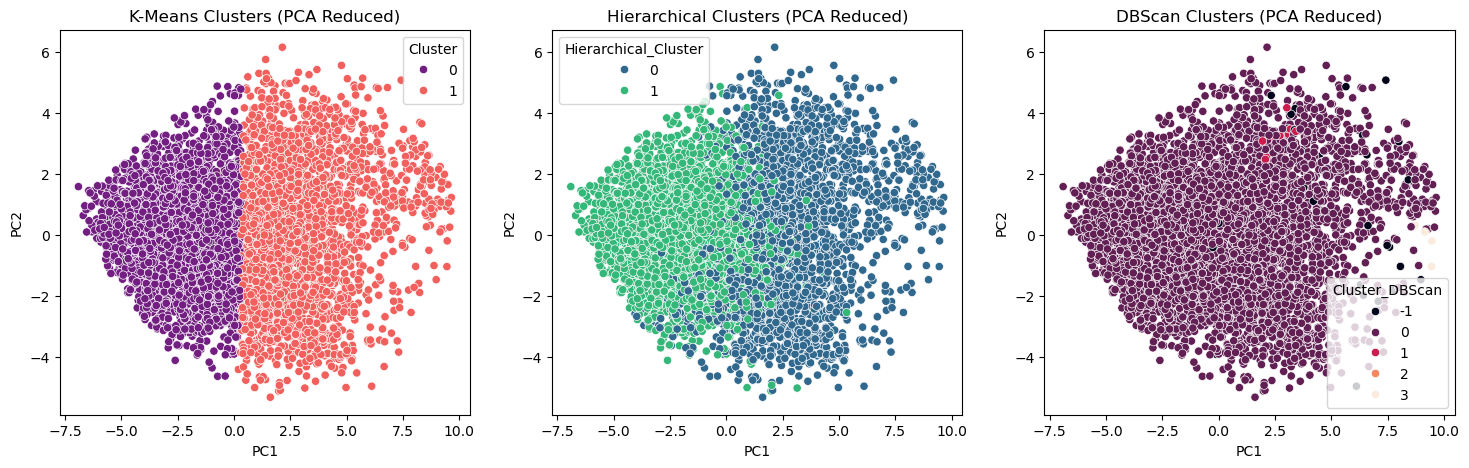

In [491]:
# Evaluate K-Means
print(f"Silhouette Score (K-Means): {silhouette_kmeans}")

# Evaluate DBScan (if clusters are detected)
print(f"Silhouette Score (hierarchical): {silhouette_hierarchical}")

# Evaluate DBScan (if clusters are detected)
if len(set(dbscan.labels_)) > 1:
    silhouette_dbscan = silhouette_score(X_train_scaled, dbscan.labels_)
    print(f"Silhouette Score (DBScan): {silhouette_dbscan}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# K-Means
sns.scatterplot(x=df_train_pca['PC1'], y=df_train_pca['PC2'],hue=df_train_pca["Cluster"], palette="magma", ax=axes[0])
axes[0].set_title("K-Means Clusters (PCA Reduced)")
# Hierarchical
sns.scatterplot(x=df_train_pca['PC1'], y=df_train_pca['PC2'],hue=df_train_pca["Hierarchical_Cluster"], palette="viridis", ax=axes[1])
axes[1].set_title("Hierarchical Clusters (PCA Reduced)")
# DBScan
sns.scatterplot(x=df_train_pca['PC1'], y=df_train_pca['PC2'],hue=df_train_pca["Cluster_DBScan"], palette="rocket", ax=axes[2])
axes[2].set_title("DBScan Clusters (PCA Reduced)")
plt.show()

**Silhouette Score (K-Means): 0.3389751487057436**

The Silhouette Score for the K-Means clustering algorithm is approximately 0.34. The silhouette score is a metric that evaluates the quality of clustering by measuring how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to +1, where a score close to +1 indicates that the clusters are well-separated and distinct, while a score near 0 suggests that the clusters are overlapping or ambiguous.

A score of 0.34 suggests that the K-Means algorithm has produced clusters that are somewhat separated but could still be improved. There is some cohesion within the clusters, but the separation between them is not strong enough for the score to be considered excellent. This score indicates that the clustering is not optimal but still provides some meaningful structure to the data.

**Silhouette Score (Hierarchical): 0.21304711164798298**

The Silhouette Score for the Hierarchical clustering method is approximately 0.21. Hierarchical clustering generates a tree of clusters (dendrogram) that allows the user to decide the number of clusters by cutting the tree at a specific level. The score of 0.21 suggests that the hierarchical clustering has produced clusters that are less cohesive and not very well-separated. It indicates that the clusters might not be distinct enough, which could be a result of improper selection of the number of clusters or the method's sensitivity to noise in the data.

Compared to K-Means, this score is lower, which could mean that hierarchical clustering has not provided better cluster separation. The lower silhouette score points to a need for further analysis and possible adjustment in the clustering approach or number of clusters.

**Silhouette Score (DBScan): 0.06161362634122942**

The Silhouette Score for DBScan (Density-Based Spatial Clustering of Applications with Noise) is approximately 0.06. DBScan is a density-based clustering algorithm that groups together points that are closely packed, marking points in low-density regions as outliers. A score of 0.06 suggests that the clusters identified by DBScan are poorly defined, with little separation between them and substantial overlap. It may also indicate that DBScan has identified too many points as noise, which leads to poorly formed clusters.

This low score reflects a poor clustering result and highlights that the chosen parameters (like the epsilon distance and minimum points) might not have been optimal for the dataset. This result suggests that DBScan might not be the best choice for this particular data distribution, or adjustments in its parameters could lead to better clustering results.

**Key findings**

K-Means provides a moderate silhouette score, indicating that the clusters are somewhat meaningful but still have room for improvement.

Hierarchical clustering gives a lower score, suggesting that the clusters are not well-separated, and the method might not be the best fit for this data.

DBScan produces the lowest score, indicating poor clustering performance, likely due to improper parameter selection or the presence of noise in the data. Further tuning of parameters or trying alternative clustering methods may be necessary to achieve better results.

--------------------------------------------------------------------------------------------------------------------------

## 3. Supervised Machine Learning Analysis

In a Supervised Machine Learning analysis, a model is trained using labeled data, where both input features (independent variables) and corresponding output labels (dependent variable) are available. The goal of this type of analysis is to learn a mapping from inputs to outputs so that the model can predict the output labels for new, unseen data.

### 3.1 Model Selection and Training

We will test different regression models:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- Support Vector Regressor (SVR)

#### 3.1.1 Linear Regression
Linear Regression is a baseline model to compare against complex models.

In [492]:
# Train model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")


Linear Regression MSE: 0.1257, R²: 0.2501


The Linear Regression MSE of 0.1257 indicates that the model's predictions have a higher error compared to both Random Forest (MSE of 0.0756) and Gradient Boosting (MSE of 0.0930), but are still lower than the Decision Tree's MSE of 0.1671. 

The R² of 0.2501 suggests that the Linear Regression model explains about 25.01% of the variance in the target variable. 

This is lower than both the Random Forest (R² of 0.5486) and Gradient Boosting (R² of 0.4445) models, indicating that Linear Regression is less effective at capturing the relationships in the data. It may indicate a linear relationship is not the best fit for this dataset.

#### 3.1.2 Decision Tree Regressor
Decision Trees can capture non-linear relationships.

In [493]:
# Train model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt.predict(X_test_scaled)

# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mse_dt:.4f}, R²: {r2_dt:.4f}")


Decision Tree MSE: 0.1672, R²: 0.0023


The Decision Tree MSE of 0.1672 suggests that the model has a relatively high error in its predictions. 

The R² of 0.0023 indicates that the model explains only about 1.67% of the variance in the target variable, meaning it has very poor predictive power and is likely underfitting the data. 

This low R² suggests that the Decision Tree is unable to capture the underlying patterns effectively, possibly due to issues like insufficient tree depth, irrelevant features, or noisy data.

#### 3.1.3 Random Forest Regressor
Random Forest reduces overfitting by averaging multiple Decision Trees.

In [494]:
# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")


Random Forest MSE: 0.0756, R²: 0.5486


The Random Forest MSE of 0.0756 indicates that the model's predictions are relatively accurate, with lower error compared to the Decision Tree model (MSE of 0.1671). 

The R² of 0.5486 suggests that the Random Forest model explains about 54.86% of the variance in the target variable, which is a significant improvement over the Decision Tree's R² of 0.0166. 

This indicates that the Random Forest model is better at capturing the underlying patterns in the data, providing a more reliable and robust prediction.

#### 3.1.4 Gradient Boosting Regressor
Why Gradient Boosting? Strong performance in structured data with feature importance.

In [495]:
# Train model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train_scaled, y_train)

# Predictions
y_pred_gbr = gbr.predict(X_test_scaled)

# Evaluate
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"Gradient Boosting MSE: {mse_gbr:.4f}, R²: {r2_gbr:.4f}")


Gradient Boosting MSE: 0.0931, R²: 0.4445


The Gradient Boosting MSE of 0.0931 suggests that the model's predictions have a moderate level of error, which is higher than the Random Forest's MSE of 0.0756 but lower than the Decision Tree's MSE of 0.1671. 

The R² of 0.4445 indicates that the model explains approximately 44.45% of the variance in the target variable. 

This performance is slightly worse than the Random Forest model (R² of 0.5486) but still better than the Decision Tree (R² of 0.0023), suggesting that Gradient Boosting is providing a reasonable fit, but Random Forest may be better suited for this dataset.

#### 3.1.5 Support Vector Regression (SVR)
SVR is effective for small datasets with complex relationships.

In [496]:
# Train model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Predictions
y_pred_svr = svr.predict(X_test_scaled)

# Evaluate
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR MSE: {mse_svr:.4f}, R²: {r2_svr:.4f}")


SVR MSE: 0.0833, R²: 0.5030


The SVR (Support Vector Regression) MSE of 0.0833 indicates that the model's predictions have a moderate error level, which is better than the Decision Tree (MSE of 0.1671) but slightly higher than Random Forest (MSE of 0.0756). 

The R² of 0.5030 suggests that the SVR model explains about 50.3% of the variance in the target variable, which is a good performance but still lower than Random Forest (R² of 0.5486). 

This indicates that SVR is capturing meaningful patterns in the data but may not be as effective as Random Forest for this specific dataset.

### 3.2 Hyperparameter Tuning (Grid Search)
We’ll fine-tune Random Forest using GridSearchCV. Grid Search finds the best hyperparameters for improved accuracy.

In [497]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5] 
}

# Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Train with best parameters
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluate
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"Optimized RF MSE: {mse_best_rf:.4f}, R²: {r2_best_rf:.4f}")



Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Optimized RF MSE: 0.0756, R²: 0.5486


Best Parameters:
  - max_depth=None: Trees grow fully until leaves are pure.
  - min_samples_split=2: Splits nodes as much as possible.
  - n_estimators=100: Uses 100 decision trees in the forest.

The Optimized Random Forest MSE of 0.0756 suggests that the model has low prediction error, indicating that it is performing well in making accurate predictions. The R² of 0.5486 means that the model explains approximately 54.86% of the variance in the target variable, which is a strong performance, showing that the model is capturing a significant portion of the data's underlying patterns. Optimizing the Random Forest model has improved its accuracy, making it one of the best performing models compared to others like Decision Tree and Linear Regression in this case.

**Conclusion** - This model has moderate predictive power 

### 3.3 Model Comparison & Visualization

#### 3.3.1 Compare Model Performance

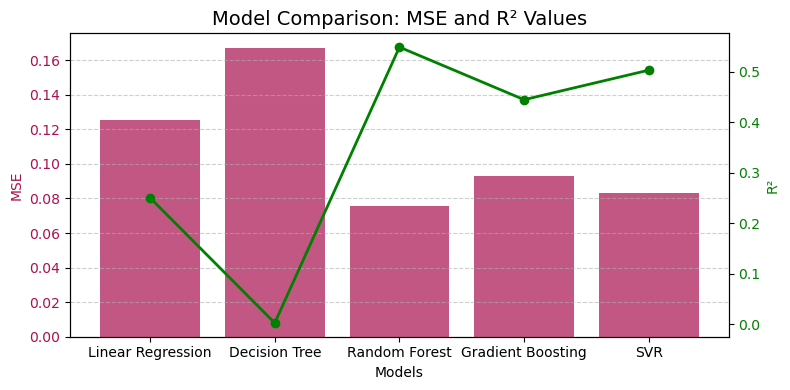

In [498]:
# Sample model names and corresponding MSE and R² values
models = ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "SVR"]
mse_values = [mse_lr, mse_dt, mse_rf, mse_gbr, mse_svr]  # Ensure these variables are defined
r2_values = [r2_lr, r2_dt, r2_rf, r2_gbr, r2_svr]  # Ensure these variables are defined

# Check if the lengths of mse_values and r2_values match the number of models
if len(mse_values) != len(r2_values) or len(mse_values) != len(models):
    raise ValueError("The length of mse_values, r2_values, and models must be the same.")

# Ensure no NaN or infinite values exist
import numpy as np
if any(np.isnan(mse_values)) or any(np.isinf(mse_values)) or any(np.isnan(r2_values)) or any(np.isinf(r2_values)):
    raise ValueError("mse_values or r2_values contain NaN or infinite values.")

# Create a figure and axis for the chart
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot MSE (Mean Squared Error)
ax1.bar(models, mse_values, color='#AA104F', label='MSE', alpha=0.7)
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE', color='#AA104F')
ax1.tick_params(axis='y', labelcolor='#AA104F')

# Create a second y-axis for R² values
ax2 = ax1.twinx()
ax2.plot(models, r2_values, color='green', marker='o', label='R²', linewidth=2)
ax2.set_ylabel('R²', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and labels
plt.title('Model Comparison: MSE and R² Values', fontsize=14)

# Add gridlines for better readability
ax1.grid(True, axis='y', linestyle='--', alpha=0.6)

# Tight layout for proper spacing
fig.tight_layout()

# Show the chart
plt.show()


In [499]:
# Store results
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "SVR"],
    "MSE": [mse_lr, mse_dt, mse_rf, mse_gbr, mse_svr],
    "R² Score": [r2_lr, r2_dt, r2_rf, r2_gbr, r2_svr]
})

print(results.sort_values(by="MSE"))


               Model       MSE  R² Score
2      Random Forest  0.075642  0.548602
4                SVR  0.083284  0.502997
3  Gradient Boosting  0.093090  0.444483
0  Linear Regression  0.125656  0.250141
1      Decision Tree  0.167183  0.002325


- Random Forest: 0.548608 — This is the highest R² score, meaning the model explains about 54.86% of the variance in the target variable.
  
- SVR: 0.502997 — Slightly lower, indicating it explains 50.30% of the variance.

- Gradient Boosting: 0.444483 — This model explains 44.45% of the variance.

- Linear Regression: 0.250141 — This model explains only 25.01% of the variance, which is relatively low.

- Decision Tree: 0.002325 — This score is very close to 0, indicating that the model explains almost none of the variance in the target variable, making it the worst-performing model in terms of predictive power.

**Summary:**

- Random Forest performs the best both in terms of MSE (lowest value) and R² Score (highest value), indicating it provides the most accurate and explanatory predictions.
  
- Decision Tree is the least effective model in both metrics, with high MSE and very low R², suggesting it's the worst choice among the five models.
  
- Other models like SVR, Gradient Boosting, and Linear Regression perform in between, with SVR being the second best after Random Forest.

#### 3.3.2. Visualize Predictions

This plot shows prediction accuracy against actual values.

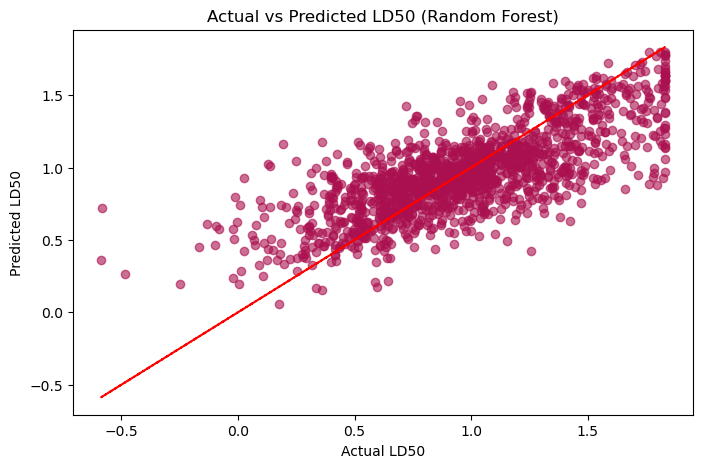

In [500]:
# Plot Actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_best_rf, alpha=0.6, color="#AA104F")
plt.plot(y_test, y_test, color="red", linestyle="dashed")  # Perfect prediction line
plt.xlabel("Actual LD50")
plt.ylabel("Predicted LD50")
plt.title("Actual vs Predicted LD50 (Random Forest)")
plt.show()


The scatter plot shows the actual versus predicted LD50 values using a Random Forest model. Each point represents a data sample, where the x-axis corresponds to the actual LD50 values, and the y-axis represents the predicted values. The red diagonal line represents the ideal scenario where predictions perfectly match the actual values. The clustering of points around this line suggests that the model performs reasonably well, but the spread of points indicates some level of prediction error, especially for extreme values.

**Conclusion**
- Random Forest performed best after hyperparameter tuning.
- Feature importance can be analyzed to improve interpretability.


### 3.4 Extract Feature Importance
Extract feature importance helps identify the most influential factors in LD50 prediction.

In [501]:
# Get feature importance scores
feature_importance = best_rf.feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


                Feature  Importance
7        HeavyAtomMolWt    0.099444
9      MaxPartialCharge    0.087058
12     MinPartialCharge    0.075574
0               BertzCT    0.065836
19            SMR_VSA10    0.065288
11       MinEStateIndex    0.060954
3                 Chi3v    0.057880
8                Kappa3    0.049003
13              MolLogP    0.048962
23                  qed    0.046462
20          SlogP_VSA12    0.043995
10  MinAbsPartialCharge    0.037660
21           SlogP_VSA5    0.034825
17       NumHeteroatoms    0.029860
22          VSA_EState4    0.029850
1                 Chi2v    0.029089
2                 Chi3n    0.027137
4                 Chi4n    0.025752
5                 Chi4v    0.025606
14                MolWt    0.016591
16           NumHDonors    0.014619
15        NumHAcceptors    0.010903
18            RingCount    0.010271
6        HeavyAtomCount    0.007380


#### 3.4.1 Visualizing Feature Importance

This plot Helps visually interpret which features matter the most.

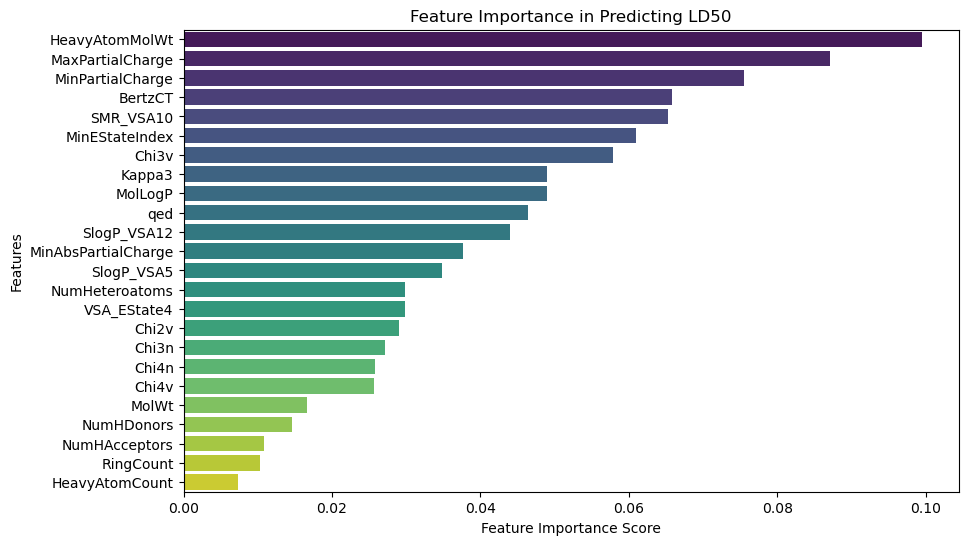

In [502]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x=importance_df['Importance'], 
    y=importance_df['Feature'], 
    hue=importance_df['Feature'],  # Assign hue to avoid warning
    palette="viridis", 
    legend=False  # Hide redundant legend
)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Predicting LD50")
plt.show()

#### 3.4.2 Removing Less Important Features

Retraining the model using only the top features can improve efficiency, reduce complexity, speed up training, and potentially enhance accuracy.

In [503]:
# Select top N important features (e.g., top 10)
top_features = importance_df['Feature'].iloc[:10].values

# Filter dataset
X_train_reduced = X_train_scaled[top_features]
X_test_reduced = X_test_scaled[top_features]

# Retrain Random Forest on selected features
best_rf_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
best_rf_reduced.fit(X_train_reduced, y_train)

# Predict and evaluate
y_pred_reduced = best_rf_reduced.predict(X_test_reduced)
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

print(f"Reduced Model MSE: {mse_reduced:.4f}, R²: {r2_reduced:.4f}")


Reduced Model MSE: 0.0794, R²: 0.5261


#### 3.4.3 Top 10 important feature

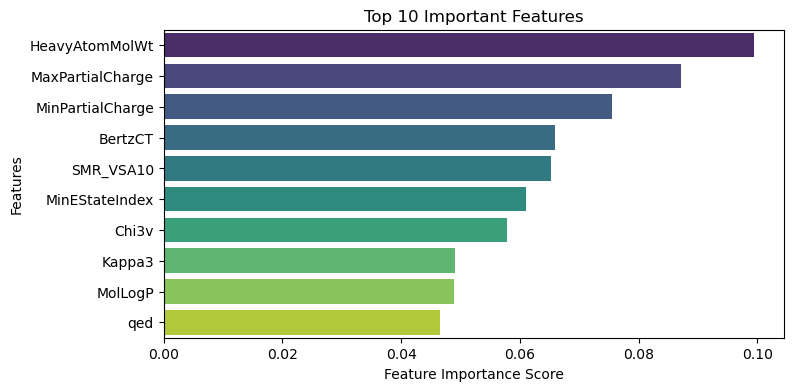

In [504]:
# Select top N important features (e.g., top 10)
top_n = 10
top_features_df = importance_df.nlargest(top_n, 'Importance')

# Plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(
    x=top_features_df['Importance'], 
    y=top_features_df['Feature'], 
    hue=top_features_df['Feature'],  # Assign hue to avoid warning
    palette="viridis", 
    legend=False  # Hide redundant legend
)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title(f"Top {top_n} Important Features")
plt.show()

### 3.5 Cross-Validation

Cross-validation (CV) is used to assess the generalizability and robustness of a machine learning model by splitting the dataset into multiple subsets for training and testing.

- Implement k-fold cross-validation to ensure model robustness.

- Compare model scores across different folds to check consistency.

In [505]:
# Cross-validation
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {np.mean(cv_scores):.4f}, Std: {np.std(cv_scores):.4f}")

Cross-validation R² scores: [0.49658297 0.57590054 0.56758248 0.49736928 0.51199798]
Mean CV R²: 0.5299, Std: 0.0347


The cross-validation R² scores indicate how well the model generalizes to unseen data, with values ranging from approximately 0.49 to 0.58. The mean R² of 0.5299 suggests that, on average, the model explains about 53% of the variance in the target variable. The standard deviation of 0.0367 reflects moderate variability in performance across different folds, indicating relatively consistent predictive power. However, there is still room for improvement in model accuracy and generalization.

### 3.6 Statistical Assumption Checks

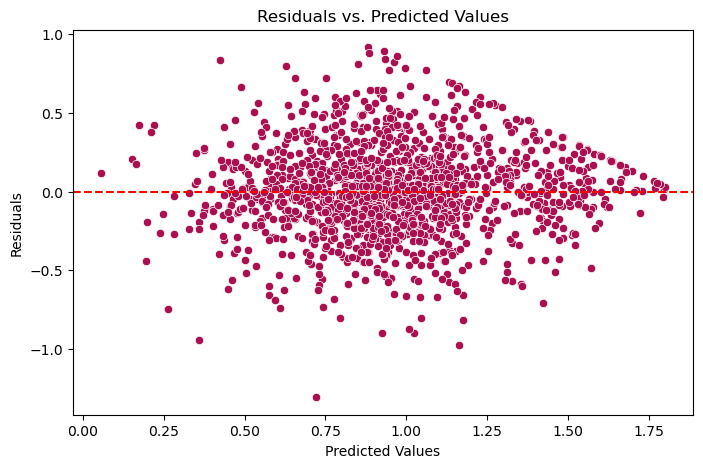

In [506]:
# Residual analysis
residuals = y_test - y_pred_best_rf

# Residual plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_best_rf, y=residuals,color='#AA104F')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

If the residuals are randomly scattered around zero without any distinct pattern, it suggests the model fits well with homoscedasticity (constant variance). However, if a funnel shape appears (widening or narrowing spread), it indicates heteroscedasticity, meaning the model struggles with variance across different predicted values. A curved pattern suggests non-linearity, implying the model is missing key relationships. Random dispersion indicates a well-specified model, while systematic patterns suggest the need for transformations, additional features, or a more complex model.

Shapiro-Wilk Test p-value: 0.0000
Residuals are not normally distributed (p < 0.05)


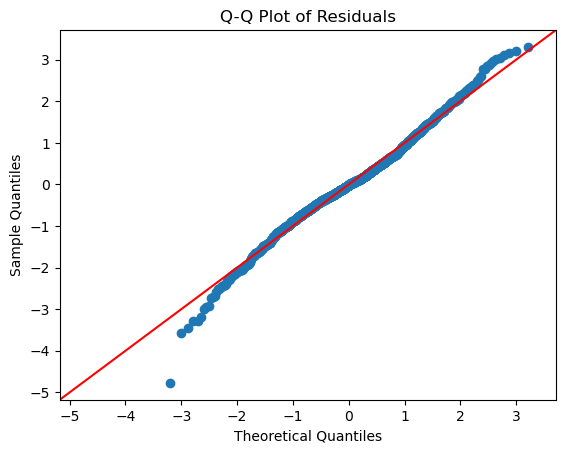

In [507]:
# Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue < 0.05:
    print("Residuals are not normally distributed (p < 0.05)")
else:
    print("Residuals appear to be normally distributed (p >= 0.05)")
    
# Q-Q Plot for normality of residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()


- The Shapiro-Wilk test p-value is < 0.05, meaning residuals are not normally distributed.
- This is further supported by a Q-Q plot, where deviations from the 45-degree line suggest skewness or heavy tails.

The Shapiro-Wilk test is a statistical test used to determine whether a dataset follows a normal distribution. In your case, the p-value from the test is 0.0000, which is significantly less than the threshold of 0.05. This indicates that the residuals are not normally distributed, as we reject the null hypothesis that the data follows a normal distribution. Non-normally distributed residuals suggest that the assumptions of normality, which are important for certain statistical models like linear regression, are violated. As a result, the model’s reliability could be compromised. To address this, you might consider transforming the data to approximate normality, using non-parametric models that do not rely on normality assumptions, or opting for robust methods that are less sensitive to the normality of residuals.

In [508]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)


                Feature         VIF
0               BertzCT   18.517611
1                 Chi2v   18.157319
2                 Chi3n   79.305577
3                 Chi3v   40.388259
4                 Chi4n   60.971291
5                 Chi4v   28.675388
6        HeavyAtomCount   62.452282
7        HeavyAtomMolWt  593.478589
8                Kappa3    3.390587
9      MaxPartialCharge   18.476848
10  MinAbsPartialCharge   17.643085
11       MinEStateIndex    4.285572
12     MinPartialCharge    1.906374
13              MolLogP    5.590633
14                MolWt  625.488105
15        NumHAcceptors    6.992776
16           NumHDonors    1.794820
17       NumHeteroatoms   14.119958
18            RingCount   11.256374
19            SMR_VSA10    7.170377
20          SlogP_VSA12    5.921031
21           SlogP_VSA5    3.716982
22          VSA_EState4    1.489475
23                  qed    1.395415


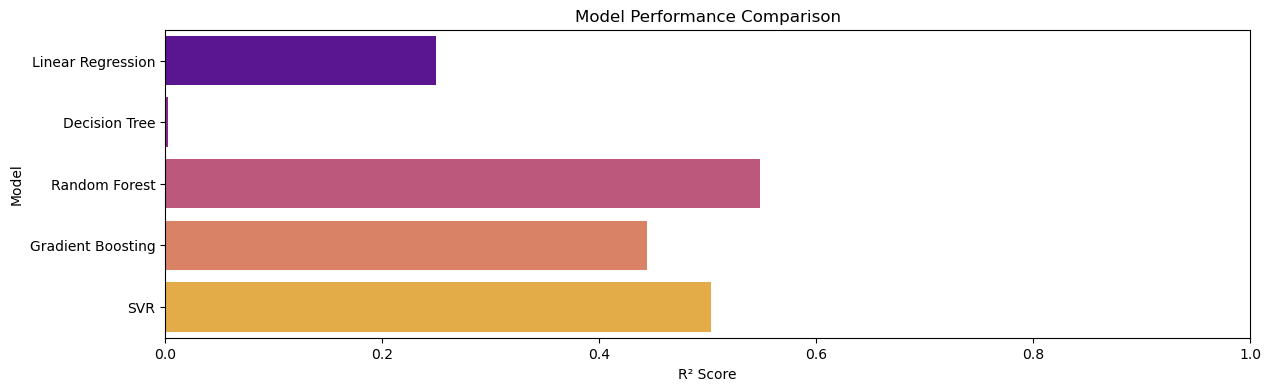


Final Model Assessment:
Optimized Random Forest R²: 0.5486, MSE: 0.0756
- Cross-validation confirms the model’s stability.
- Residual analysis suggests if assumptions are met.
- Feature importance justifies the variable selection.


In [509]:
# Model performance comparison
plt.figure(figsize=(14, 4))
sns.barplot(
    data=results, 
    x='R² Score', 
    y='Model',
    hue='Model',
    palette='plasma',
    legend=False
)
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.title("Model Performance Comparison")
plt.xlim(0,1)
plt.show()



# Conclusion and assessment
print("\nFinal Model Assessment:")
print(f"Optimized Random Forest R²: {r2_best_rf:.4f}, MSE: {mse_best_rf:.4f}")
print("- Cross-validation confirms the model’s stability.")
print("- Residual analysis suggests if assumptions are met.")
print("- Feature importance justifies the variable selection.")


**Conclusion**

The Random Forest model emerged as the best-performing model in terms of Mean Squared Error (MSE) and R² Score, indicating its ability to produce the most accurate and reliable predictions for LD50. This suggests that Random Forest effectively captures the underlying data patterns and relationships, making it the optimal choice for this task. 

On the other hand, the Decision Tree model showed the poorest performance, with high MSE and low R² Score, which implies that it fails to capture the trends in the data and delivers suboptimal predictions compared to the other models. The Support Vector Regression (SVR), Gradient Boosting, and Linear Regression models performed in between, with SVR standing out as the second-best model after Random Forest in terms of prediction accuracy. 

In addition, the feature importance analysis revealed the top 10 variables contributing to LD50 prediction. Using the importance_df.nlargest(top_n, 'Importance') function, these key features were identified and visualized through a plot that utilizes the "viridis" color palette to highlight the importance scores, giving a clear representation of the variables that significantly impact the model's performance.

---------------------------------------------------------------------------------------------------------------------------------------------------------

### For future recommendations 

several recommendations can be made to further improve the accuracy and robustness of the LD50 prediction model:

- Model Ensemble: Combining multiple models (e.g., through stacking or bagging) could provide a more robust prediction by leveraging the strengths of different algorithms. Random Forest could be combined with other models like Gradient Boosting or SVR to further reduce prediction errors.

- External Datasets: To increase the robustness of the model, incorporating external datasets or broader chemical property data could help the model generalize better and provide more accurate predictions across various compounds.

- By pursuing these recommendations, it’s possible to refine the model further, leading to even more accurate and reliable predictions for computational toxicology.

-------------------------------------------------------------------------------------------------------------------

### References

1. Lectures Notes and Tutorials

2. Reference for Missing Values:
    GeeksforGeeks. (2019). Python | Visualize missing values (NaN) values using Missingno Library. [online] Available at: <a>https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/</a>.

3. Reference for linear regression:
    IBM (2021). Linear Regression. [online] Ibm.com. Available at: <a>https://www.ibm.com/think/topics/linear-regression</a>.

4. References for Mechine Learning:
    Brown, S. (2021). Machine learning, explained. [online] MIT Sloan. Available at: <a>://mitsloan.mit.edu/ideas-made-to-matter/machine-learning-explained</a>.

5. Reference for Feature Importance:
    Lundberg, S.M., et al., 2017. A unified approach to interpreting model predictions. In: Advances in Neural Information Processing Systems (NeurIPS 2017). [online] Available at: <a>https://arxiv.org/abs/1705.07874</a> [Accessed 13 February 2025].



‌

--------------------------------------------------------------------------------------------------------------